In [1]:
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('general_data.csv') 

# Display the first few rows and basic information
print(df.head())
print(df.info())



   Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0          2  Life Sciences              1           1  Female  ...   
1          1  Life Sciences              1           2  Female  ...   
2          4          Other              1           3    Male  ...   
3          5  Life Sciences              1           4    Male  ...   
4          1        Medical              1           5    Male  ...   

   NumCompaniesWorked Over18 PercentSalaryHike  StandardHours  \
0                 1.0

In [2]:
# Check for missing values
print(df.isnull().sum())


Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


In [3]:
df['NumCompaniesWorked'].fillna(df['NumCompaniesWorked'].mean(), inplace=True)

# Verify that missing values have been handled
print(df['NumCompaniesWorked'].isnull().sum())

0


In [4]:
print(df['NumCompaniesWorked'])


0       1.0
1       0.0
2       1.0
3       3.0
4       4.0
       ... 
4405    3.0
4406    2.0
4407    0.0
4408    0.0
4409    0.0
Name: NumCompaniesWorked, Length: 4410, dtype: float64


In [5]:
df['TotalWorkingYears'].fillna(df['TotalWorkingYears'].mean(), inplace=True)

# Verify that missing values have been handled
print(df['TotalWorkingYears'].isnull().sum())

0


In [6]:
print(df['TotalWorkingYears'])

0        1.000000
1        6.000000
2        5.000000
3       13.000000
4        9.000000
          ...    
4405    10.000000
4406    10.000000
4407     5.000000
4408    10.000000
4409    11.279936
Name: TotalWorkingYears, Length: 4410, dtype: float64


In [7]:
df['NumCompaniesWorked'] = df['NumCompaniesWorked'].astype(int)

df['TotalWorkingYears'] = df['TotalWorkingYears'].astype(int)

In [8]:
# Check for missing values
print(df.isnull().sum())


Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64


In [9]:
# Display the first few rows and basic information
print(df.head())
print(df.info())

   Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0          2  Life Sciences              1           1  Female  ...   
1          1  Life Sciences              1           2  Female  ...   
2          4          Other              1           3    Male  ...   
3          5  Life Sciences              1           4    Male  ...   
4          1        Medical              1           5    Male  ...   

   NumCompaniesWorked Over18 PercentSalaryHike  StandardHours  \
0                   1

In [10]:
def binary_encode(df, column):
    categories = df[column].unique()
    categories_sorted = np.sort(categories)
    
    n_bits = int(np.ceil(np.log2(len(categories))))
    binary_dict = {cat: format(i, f'0{n_bits}b') for i, cat in enumerate(categories_sorted)}
    
    binary_encoded = df[column].map(binary_dict)
    
    for i in range(n_bits):
        df[f'{column}_bin_{i}'] = binary_encoded.str[i].astype(int)
    
    df = df.drop(column, axis=1)
    
    return df

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply binary encoding to all categorical columns
df_binary_encoded = df.copy()
for col in categorical_columns:
    df_binary_encoded = binary_encode(df_binary_encoded, col)

# Print the shape and first few rows of the encoded dataframe
print("Shape after binary encoding:", df_binary_encoded.shape)
print(df_binary_encoded.head())


Shape after binary encoding: (4410, 31)
   Age  DistanceFromHome  Education  EmployeeCount  EmployeeID  JobLevel  \
0   51                 6          2              1           1         1   
1   31                10          1              1           2         1   
2   32                17          4              1           3         4   
3   38                 2          5              1           4         3   
4   32                10          1              1           5         1   

   MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  StandardHours  ...  \
0         131160                   1                 11              8  ...   
1          41890                   0                 23              8  ...   
2         193280                   1                 15              8  ...   
3          83210                   3                 11              8  ...   
4          23420                   4                 12              8  ...   

   EducationField_bin_0  Edu

In [11]:
def binary_encode(df, column):
    categories = df[column].unique()
    categories_sorted = np.sort(categories)
    
    n_bits = int(np.ceil(np.log2(len(categories))))
    binary_dict = {cat: format(i, f'0{n_bits}b') for i, cat in enumerate(categories_sorted)}
    
    binary_encoded = df[column].map(binary_dict)
    
    for i in range(n_bits):
        df[f'{column}_bin_{i}'] = binary_encoded.str[i].astype(int)
    
    df = df.drop(column, axis=1)
    
    return df


# Specify target variable name
target_column = 'Attrition'

# Separate features and target
X = df.drop(target_column, axis=1)
y = df[target_column]

# Identify categorical columns in features
categorical_columns = X.select_dtypes(include=['object']).columns

# Apply binary encoding to all categorical columns in features
X_encoded = X.copy()
for col in categorical_columns:
    X_encoded = binary_encode(X_encoded, col)

# Print the shape and first few rows of the encoded features
print("Shape of encoded features (X):", X_encoded.shape)
print(X_encoded.head())

# Print information about the target variable
print("\nTarget variable (y) information:")
print(y.dtype)
print(y.value_counts())

# If you want to encode the target variable as well (if it's categorical):
if y.dtype == 'object':
    y_encoded = pd.get_dummies(y, prefix='target')
    print("\nEncoded target variable shape:", y_encoded.shape)
    print(y_encoded.head())
else:
    print("\nTarget variable is not of type 'object', no encoding applied.")

Shape of encoded features (X): (4410, 30)
   Age  DistanceFromHome  Education  EmployeeCount  EmployeeID  JobLevel  \
0   51                 6          2              1           1         1   
1   31                10          1              1           2         1   
2   32                17          4              1           3         4   
3   38                 2          5              1           4         3   
4   32                10          1              1           5         1   

   MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  StandardHours  ...  \
0         131160                   1                 11              8  ...   
1          41890                   0                 23              8  ...   
2         193280                   1                 15              8  ...   
3          83210                   3                 11              8  ...   
4          23420                   4                 12              8  ...   

   EducationField_bin_0  E

In [12]:
print(y_encoded)

      target_No  target_Yes
0          True       False
1         False        True
2          True       False
3          True       False
4          True       False
...         ...         ...
4405       True       False
4406       True       False
4407       True       False
4408       True       False
4409       True       False

[4410 rows x 2 columns]



Logistic Regression Results:
Accuracy: 0.8458

Classification Report:
              precision    recall  f1-score   support

   target_No       0.86      0.98      0.91       741
  target_Yes       0.58      0.13      0.22       141

    accuracy                           0.85       882
   macro avg       0.72      0.56      0.57       882
weighted avg       0.81      0.85      0.80       882


Confusion Matrix:
[[727  14]
 [122  19]]

Decision Tree Results:
Accuracy: 0.9819

Classification Report:
              precision    recall  f1-score   support

   target_No       0.99      0.99      0.99       741
  target_Yes       0.93      0.96      0.94       141

    accuracy                           0.98       882
   macro avg       0.96      0.97      0.97       882
weighted avg       0.98      0.98      0.98       882


Confusion Matrix:
[[730  11]
 [  5 136]]

Random Forest Results:
Accuracy: 0.9830

Classification Report:
              precision    recall  f1-score   support

   tar

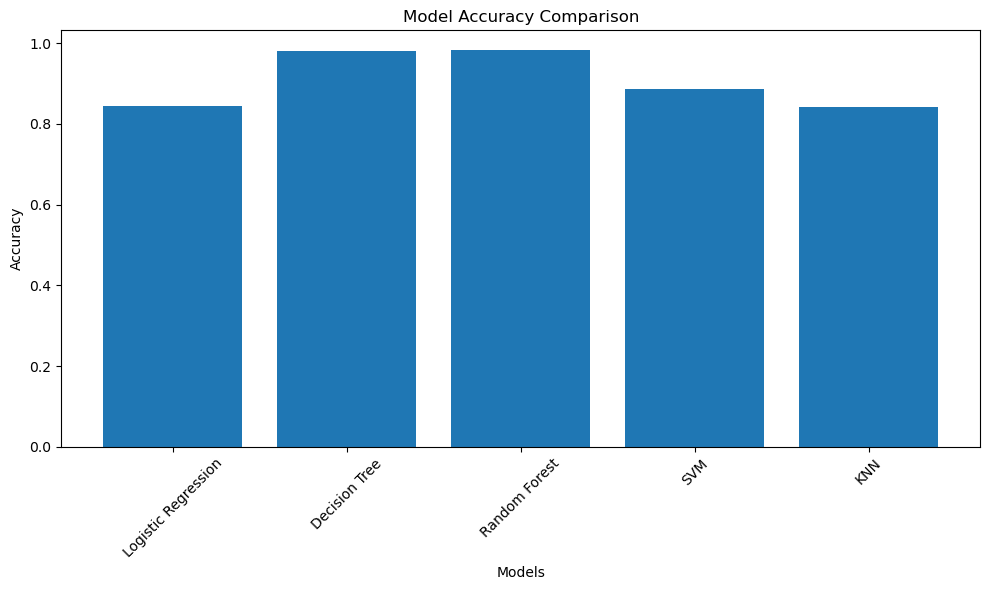

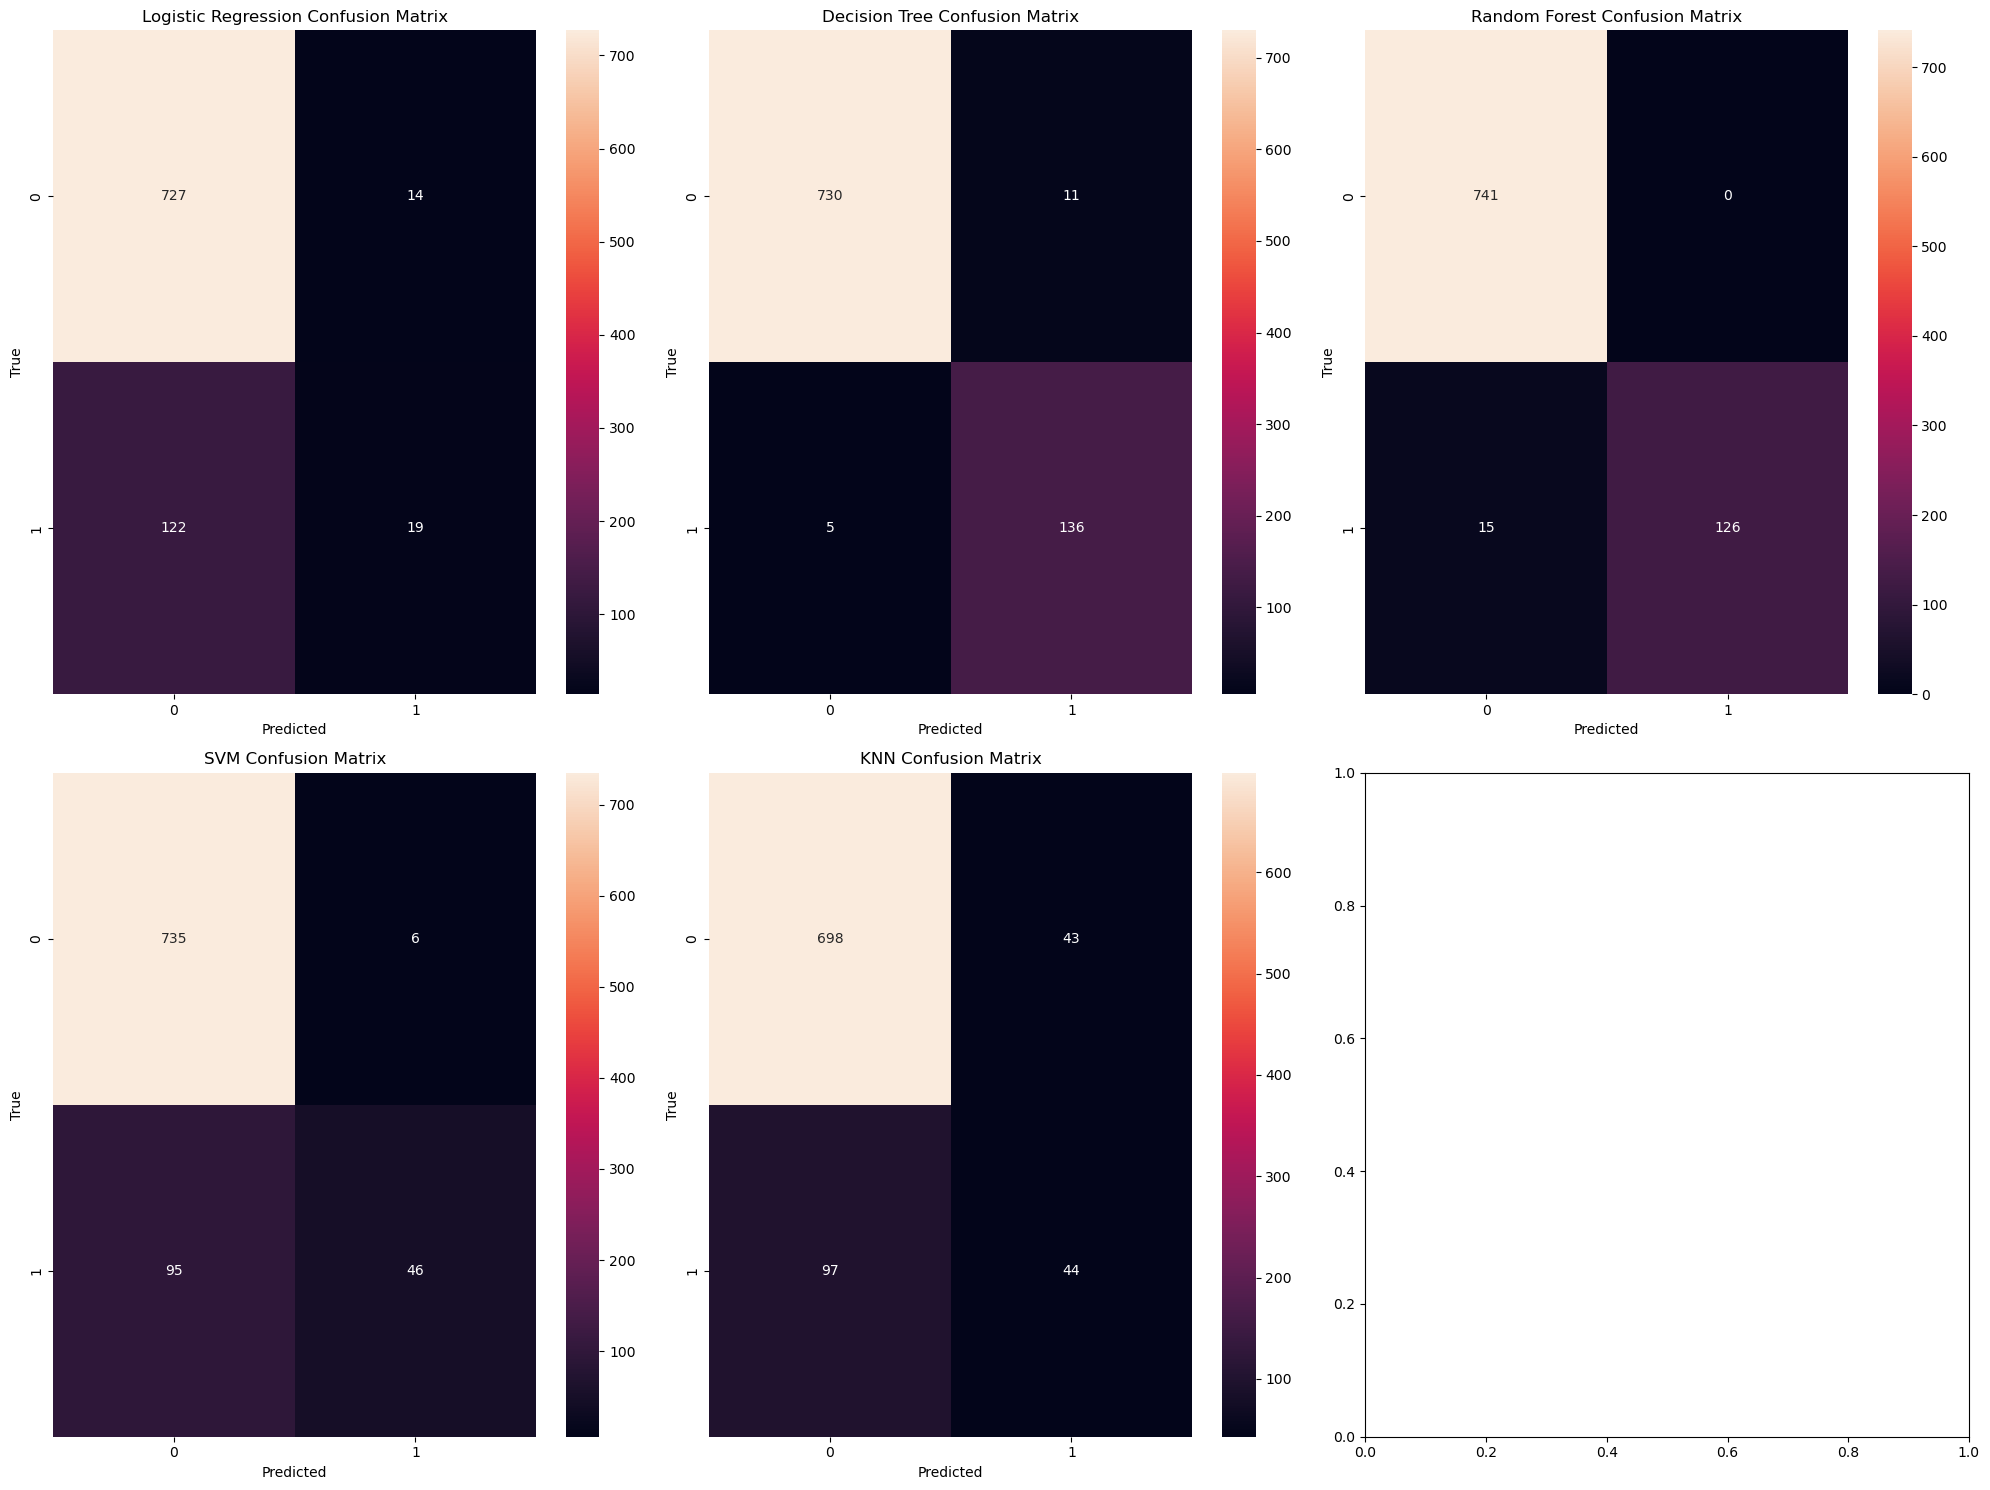

In [13]:
# Prediction using machine learning algorithms

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Convert y_encoded back to a single column if it's one-hot encoded
if isinstance(y_encoded, pd.DataFrame):
    y = y_encoded.idxmax(axis=1)
else:
    y = y_encoded

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the models
models = {
    "Logistic Regression": OneVsRestClassifier(LogisticRegression(random_state=42)),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": OneVsRestClassifier(SVC(random_state=42)),
    "KNN": KNeighborsClassifier()
}

# Function to train and evaluate a model
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, y_pred

# Train and evaluate each model
results = {}
for name, model in models.items():
    accuracy, y_pred = train_evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    results[name] = {"accuracy": accuracy, "predictions": y_pred}
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Visualize the results
plt.figure(figsize=(10, 6))
accuracies = [result["accuracy"] for result in results.values()]
plt.bar(results.keys(), accuracies)
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
axes = axes.ravel()

for i, (name, result) in enumerate(results.items()):
    cm = confusion_matrix(y_test, result["predictions"])
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i])
    axes[i].set_title(f"{name} Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("True")

plt.tight_layout()
plt.show()

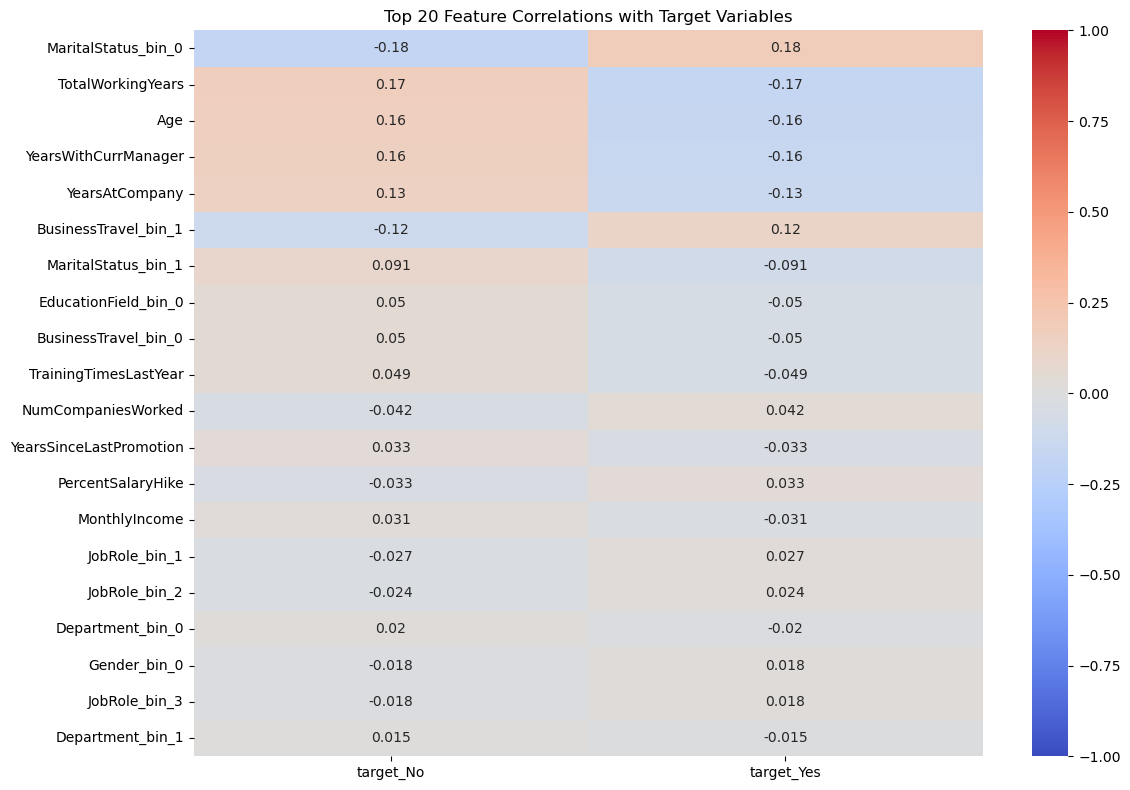

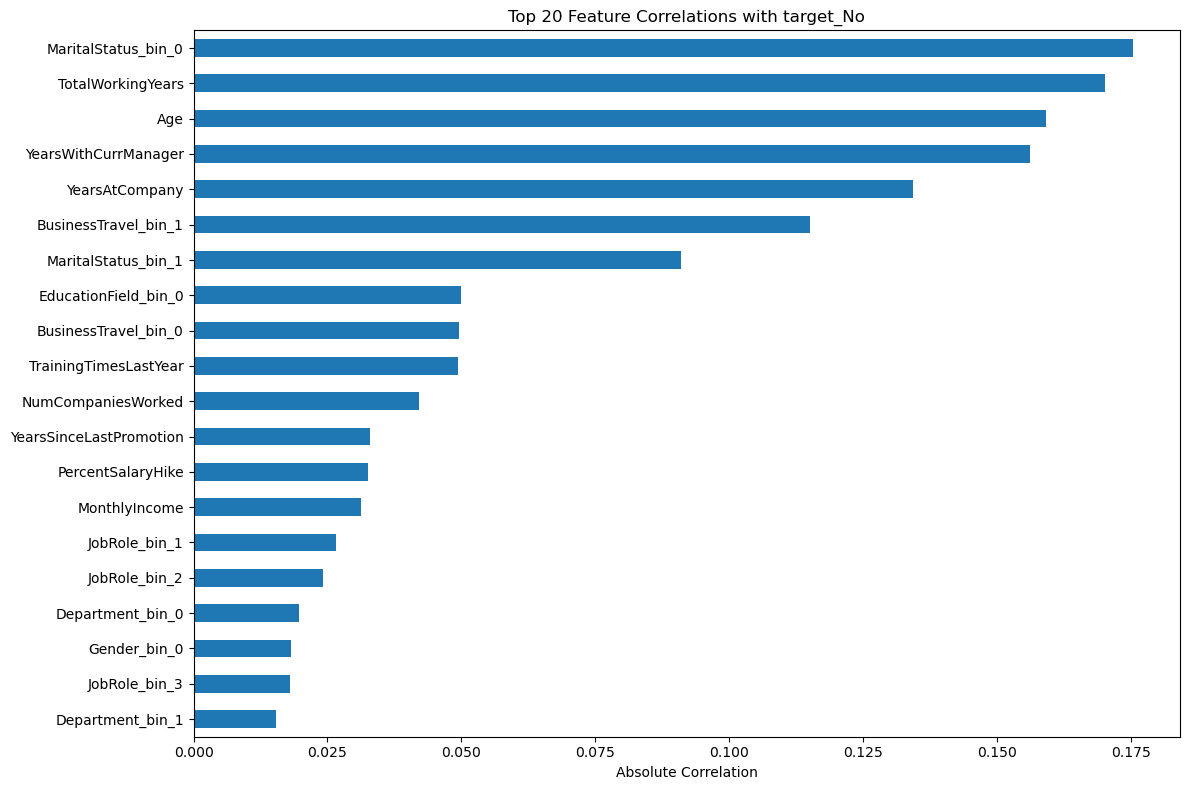

In [14]:
# Correlation graphs for all the variables with the target variable

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Combine X_encoded and y_encoded into a single dataframe
df_combined = pd.concat([X_encoded, y_encoded], axis=1)

# Calculate the correlation matrix
correlation_matrix = df_combined.corr()

# Get the correlations with the target variables
target_correlations = correlation_matrix[y_encoded.columns].drop(y_encoded.columns)

# Sort correlations by absolute value
sorted_correlations = target_correlations.abs().sort_values(by=y_encoded.columns[0], ascending=False)

# Select top N features 
N = 20
top_features = sorted_correlations.index[:N]

# Create a new dataframe with top features and their correlations
top_correlations = target_correlations.loc[top_features]

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(top_correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title(f'Top {N} Feature Correlations with Target Variables')
plt.tight_layout()
plt.show()

# Bar plot for a single target variable (if multiple targets, choose one)
plt.figure(figsize=(12, 8))
target_column = y_encoded.columns[0]  # Choose the first target variable if multiple
abs_correlations = top_correlations[target_column].abs().sort_values(ascending=True)
abs_correlations.plot(kind='barh')
plt.title(f'Top {N} Feature Correlations with {target_column}')
plt.xlabel('Absolute Correlation')
plt.tight_layout()
plt.show()

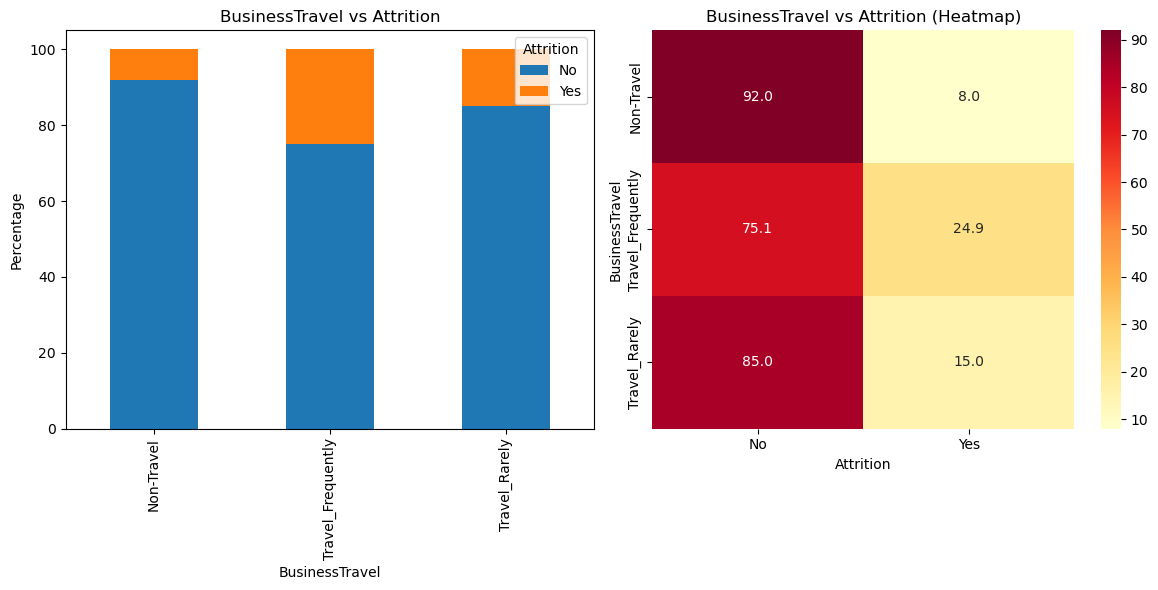

Chi-square statistic: 72.5472
p-value: 0.0000

Contingency Table:
Attrition            No  Yes
BusinessTravel              
Non-Travel          414   36
Travel_Frequently   624  207
Travel_Rarely      2661  468

Percentage Table:
Attrition                 No        Yes
BusinessTravel                         
Non-Travel         92.000000   8.000000
Travel_Frequently  75.090253  24.909747
Travel_Rarely      85.043145  14.956855


In [15]:
# Correlation graphs showing the propotion of each of the work models in “BusinessTravel” variable with the Target variable

# Assuming: Non-Travel = Remote work model
# Assuming: Travel_Frequently = Onsite work model
# Assuming: Travel_Rarely = Hybrid work model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['BusinessTravel'], df['Attrition'])

# Perform Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Calculate percentages
percentage_table = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Plotting
plt.figure(figsize=(12, 6))

# Bar plot
ax1 = plt.subplot(121)
percentage_table.plot(kind='bar', stacked=True, ax=ax1)
plt.title('BusinessTravel vs Attrition')
plt.xlabel('BusinessTravel')
plt.ylabel('Percentage')
plt.legend(title='Attrition', loc='upper right')

# Heatmap
ax2 = plt.subplot(122)
sns.heatmap(percentage_table, annot=True, cmap='YlOrRd', fmt='.1f', ax=ax2)
plt.title('BusinessTravel vs Attrition (Heatmap)')
plt.xlabel('Attrition')
plt.ylabel('BusinessTravel')

plt.tight_layout()
plt.show()

# Print Chi-square test results
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")

# Print the contingency table
print("\nContingency Table:")
print(contingency_table)

# Print the percentage table
print("\nPercentage Table:")
print(percentage_table)

Before Undersampling: {'target_No': 2958, 'target_Yes': 570}
After Undersampling: {'target_No': 570, 'target_Yes': 570}

Logistic Regression Results:
Accuracy: 0.6451

Classification Report:
              precision    recall  f1-score   support

   target_No       0.91      0.64      0.75       741
  target_Yes       0.27      0.69      0.38       141

    accuracy                           0.65       882
   macro avg       0.59      0.66      0.57       882
weighted avg       0.81      0.65      0.69       882


Confusion Matrix:
[[472 269]
 [ 44  97]]

Decision Tree Results:
Accuracy: 0.7925

Classification Report:
              precision    recall  f1-score   support

   target_No       0.97      0.78      0.86       741
  target_Yes       0.43      0.88      0.58       141

    accuracy                           0.79       882
   macro avg       0.70      0.83      0.72       882
weighted avg       0.88      0.79      0.82       882


Confusion Matrix:
[[575 166]
 [ 17 124]]

Rando

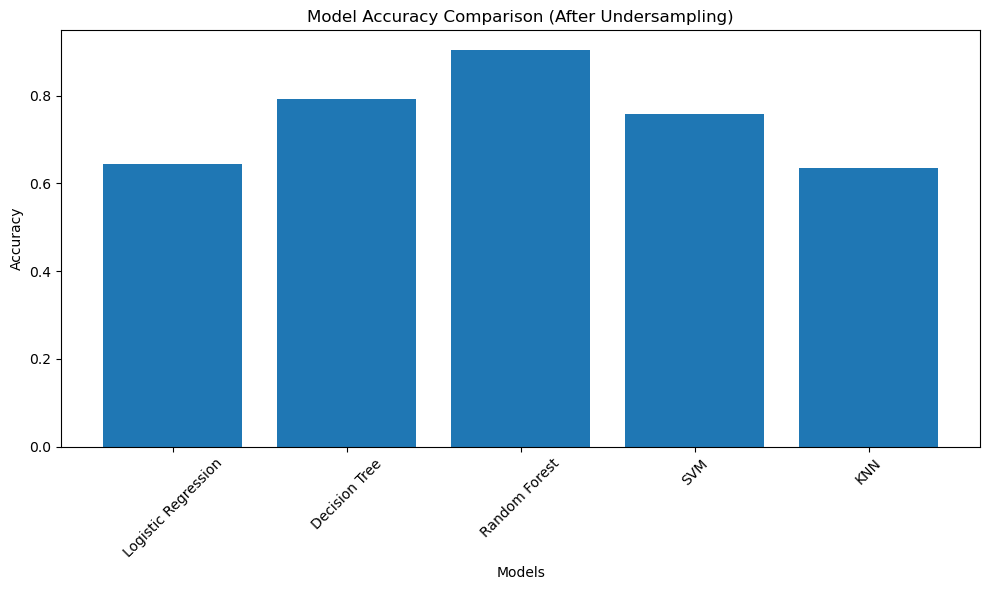

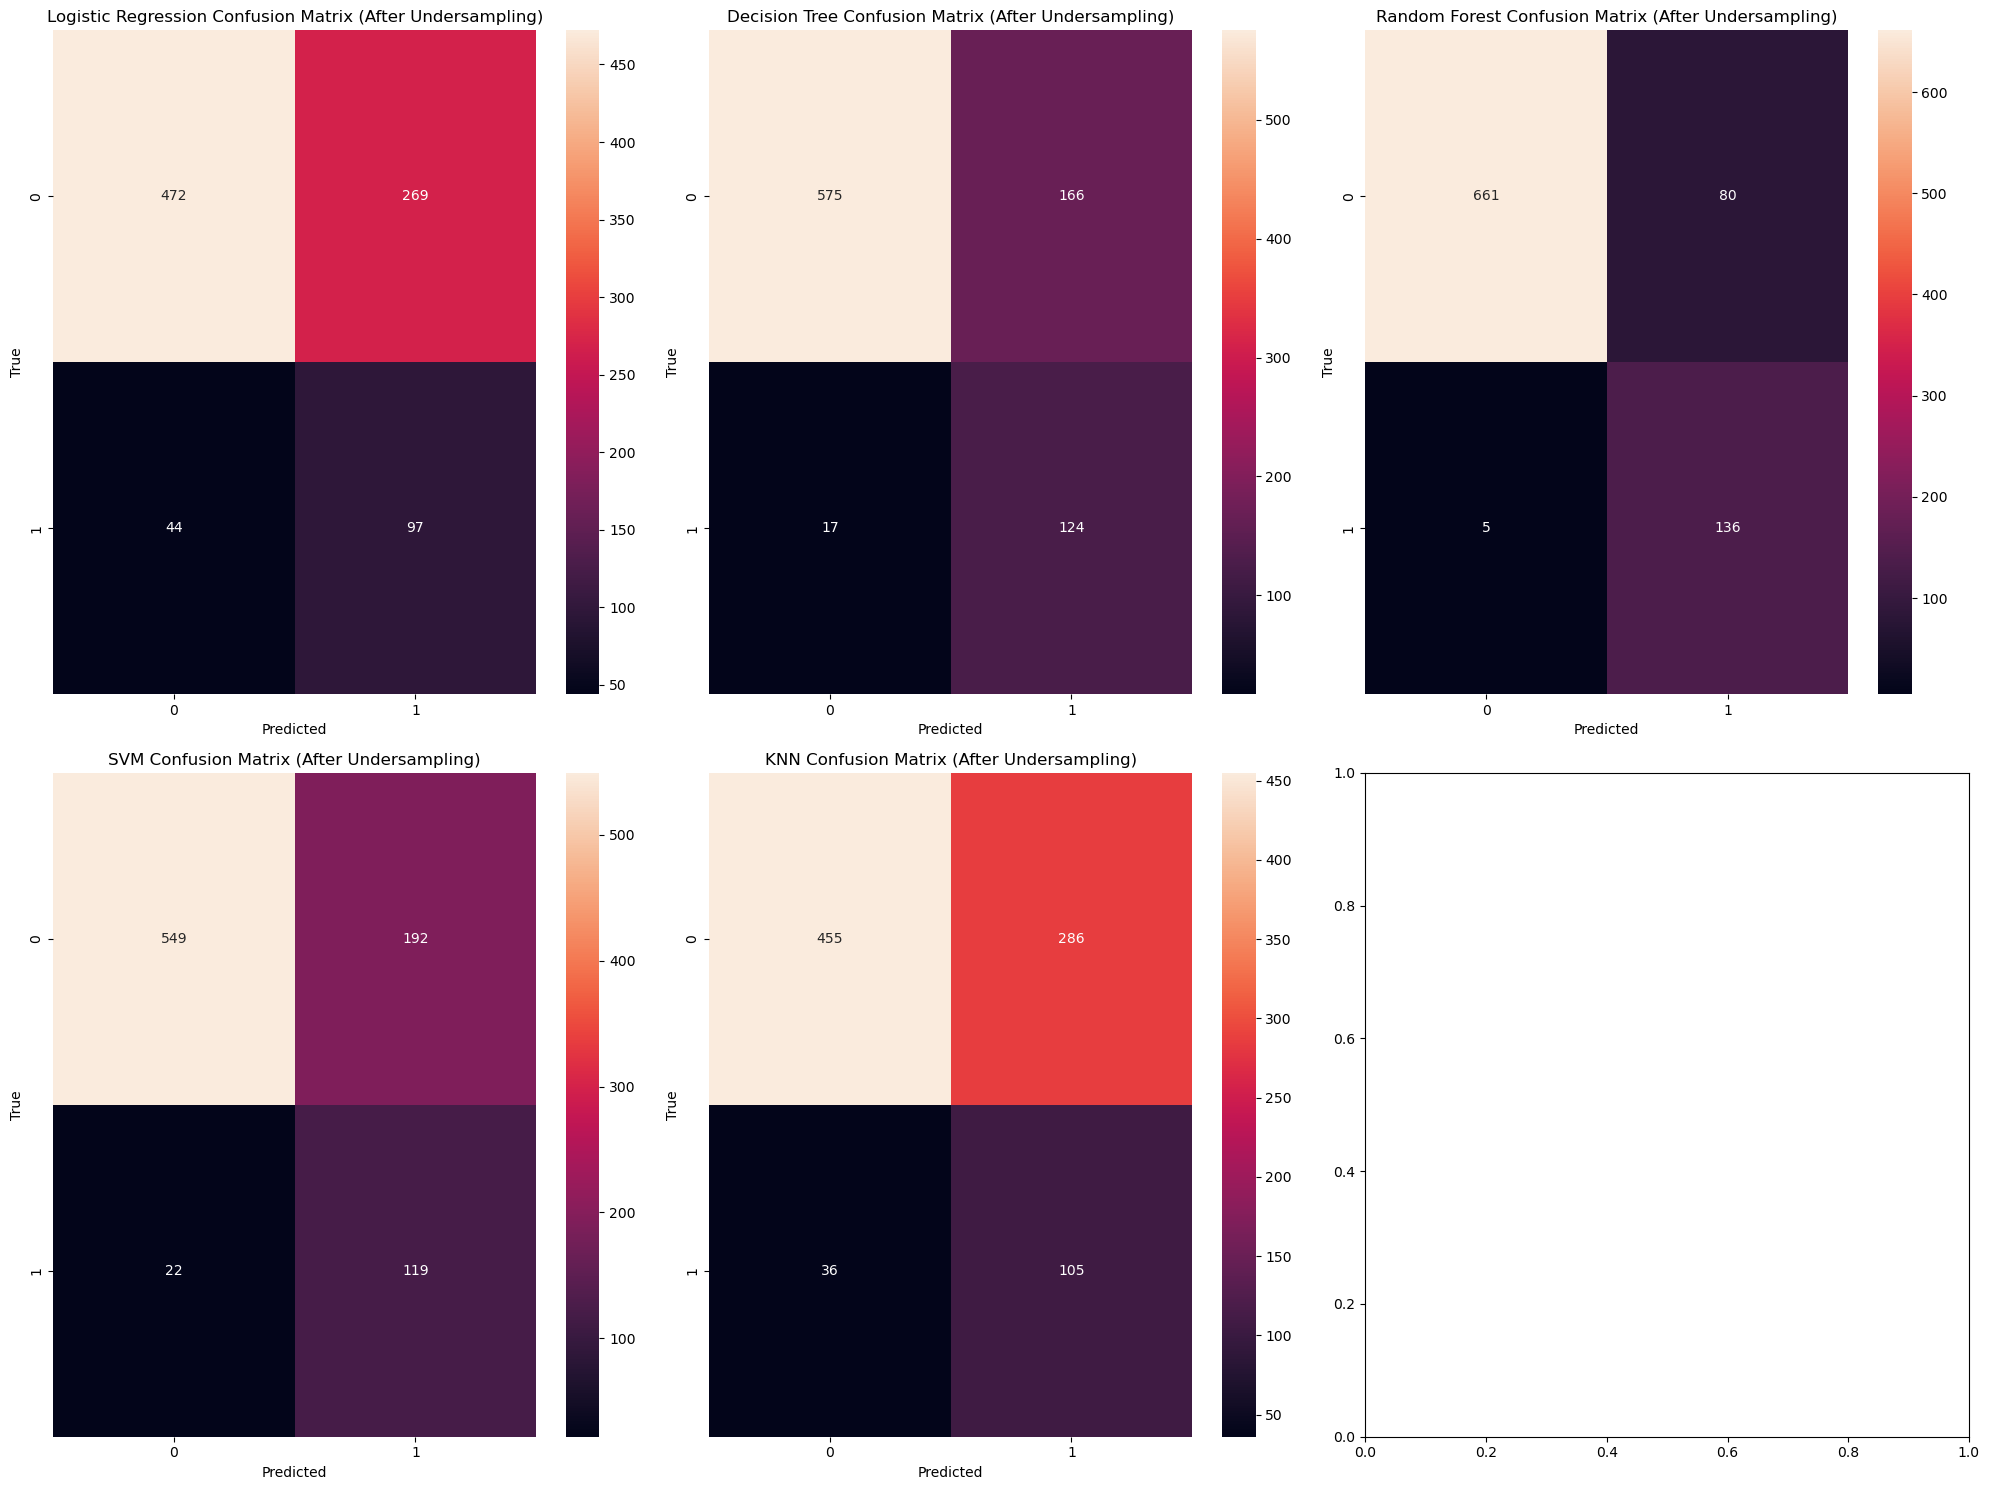

Constant features after undersampling: ['EmployeeCount', 'StandardHours']

Feature Correlations with Target Variable:
Age: 0.0000
DistanceFromHome: 0.0000
Education: 0.0000
EmployeeCount: 0.0000
EmployeeID: 0.0000
JobLevel: 0.0000
MonthlyIncome: 0.0000
NumCompaniesWorked: 0.0000
PercentSalaryHike: 0.0000
StandardHours: 0.0000
StockOptionLevel: 0.0000
TotalWorkingYears: 0.0000
TrainingTimesLastYear: 0.0000
YearsAtCompany: 0.0000
YearsSinceLastPromotion: 0.0000
YearsWithCurrManager: 0.0000
BusinessTravel_bin_0: 0.0000
BusinessTravel_bin_1: 0.0000
Department_bin_0: 0.0000
Department_bin_1: 0.0000
EducationField_bin_0: 0.0000
EducationField_bin_1: 0.0000
EducationField_bin_2: 0.0000
Gender_bin_0: 0.0000
JobRole_bin_0: 0.0000
JobRole_bin_1: 0.0000
JobRole_bin_2: 0.0000
JobRole_bin_3: 0.0000
MaritalStatus_bin_0: 0.0000
MaritalStatus_bin_1: 0.0000


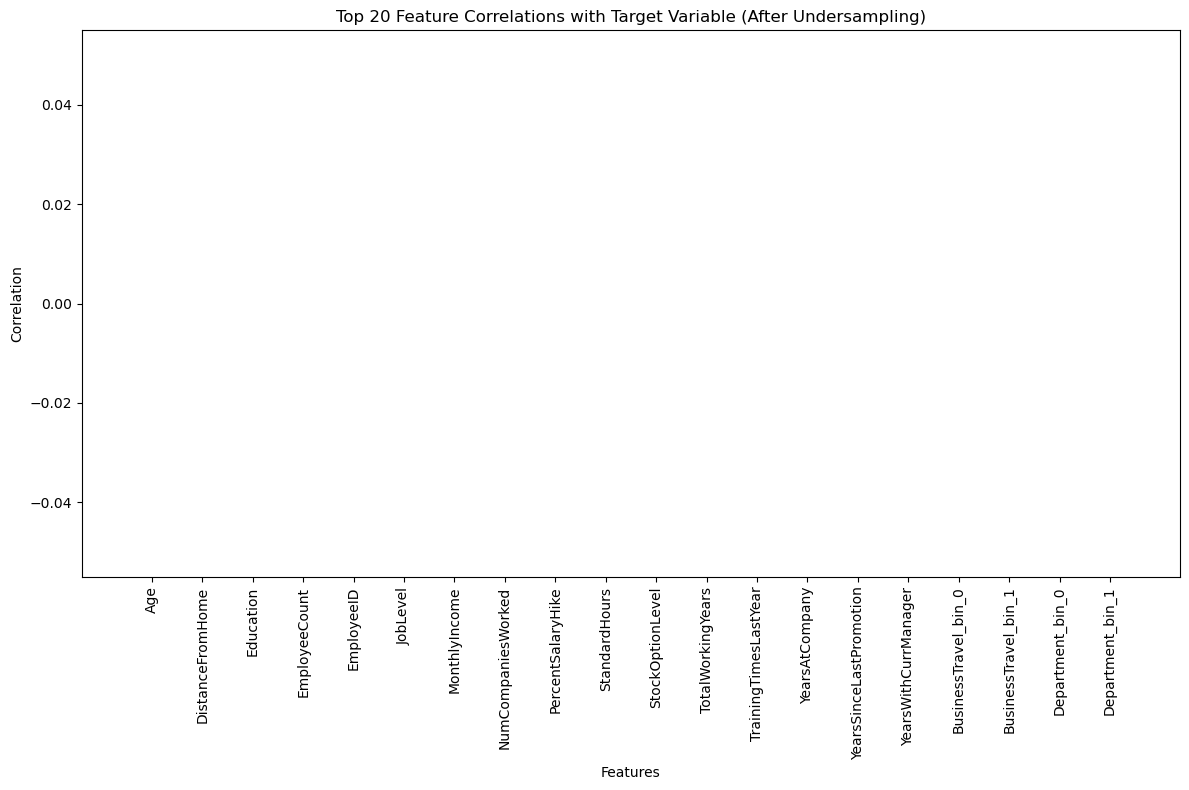

In [25]:
# Applying Random Undersampling Technique on Target variable and predicting using machine learning algorithms

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr, chi2_contingency

if isinstance(y, pd.DataFrame):
    y = y.idxmax(axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Function to perform random undersampling
def random_undersample(X, y):
    # Ensure X and y are pandas DataFrame and Series
    X = pd.DataFrame(X)
    y = pd.Series(y)
    
    # Combine X and y
    df = pd.concat([X, y.rename('target')], axis=1)
    
    # Get counts of each class
    class_counts = y.value_counts()
    min_count = class_counts.min()
    
    # Undersample each class
    undersampled_dfs = []
    for cls in class_counts.index:
        cls_df = df[df['target'] == cls]
        undersampled_cls = cls_df.sample(n=min_count, random_state=42)
        undersampled_dfs.append(undersampled_cls)
    
    # Combine undersampled data
    undersampled_df = pd.concat(undersampled_dfs, axis=0).sample(frac=1, random_state=42)
    
    # Split back into X and y
    X_undersampled = undersampled_df.drop('target', axis=1)
    y_undersampled = undersampled_df['target']
    
    return X_undersampled, y_undersampled

# Apply random undersampling to the training data
X_train_rus, y_train_rus = random_undersample(X_train, y_train)
print("Before Undersampling:", dict(zip(*np.unique(y_train, return_counts=True))))
print("After Undersampling:", dict(zip(*np.unique(y_train_rus, return_counts=True))))
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_rus)
X_test_scaled = scaler.transform(X_test)

# Define the models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier()
}

# Function to train and evaluate a model
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, y_pred

# Train and evaluate each model
results = {}
for name, model in models.items():
    accuracy, y_pred = train_evaluate_model(model, X_train_scaled, X_test_scaled, y_train_rus, y_test)
    results[name] = {"accuracy": accuracy, "predictions": y_pred}
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Visualize the results
plt.figure(figsize=(10, 6))
accuracies = [result["accuracy"] for result in results.values()]
plt.bar(results.keys(), accuracies)
plt.title("Model Accuracy Comparison (After Undersampling)")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
axes = axes.ravel()
for i, (name, result) in enumerate(results.items()):
    cm = confusion_matrix(y_test, result["predictions"])
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i])
    axes[i].set_title(f"{name} Confusion Matrix (After Undersampling)")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("True")
plt.tight_layout()
plt.show()

# Check for constant features
constant_features = X_train_rus.columns[X_train_rus.nunique() == 1].tolist()
print("Constant features after undersampling:", constant_features)

# Remove constant features
X_train_rus = X_train_rus.drop(columns=constant_features)
X_test = X_test.drop(columns=constant_features)

# Combine X_train_rus and y_train_rus into a DataFrame for correlation analysis
df_rus = pd.DataFrame(X_train_rus, columns=X_encoded.columns)
df_rus['target'] = y_train_rus

# Function to calculate correlation based on feature type
def calculate_correlation(feature, target):
    if pd.api.types.is_numeric_dtype(feature):
        if feature.nunique() == 1:
            return 0  # Return 0 correlation for constant features
        try:
            correlation, p_value = pointbiserialr(target, feature)
            return abs(correlation)
        except:
            return 0  # Return 0 if correlation can't be calculated
    else:
        if feature.nunique() == 1:
            return 0  # Return 0 correlation for constant features
        try:
            chi2, p_value, dof, expected = chi2_contingency([feature, target])
            n = len(feature)
            return np.sqrt(chi2 / (n * (min(feature.nunique(), target.nunique()) - 1)))
        except:
            return 0  # Return 0 if chi-square can't be calculated

# Calculate correlations

correlations = {}
for column in df_rus.columns[:-1]:  # Exclude the target column
    correlations[column] = calculate_correlation(df_rus[column], df_rus['target'])

# Sort correlations
sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)


# Print correlations
print("\nFeature Correlations with Target Variable:")
for feature, correlation in sorted_correlations:
    print(f"{feature}: {correlation:.4f}")

# Visualize top 20 correlations
plt.figure(figsize=(12, 8))
top_20_correlations = dict(sorted_correlations[:20])
plt.bar(top_20_correlations.keys(), top_20_correlations.values())
plt.title("Top 20 Feature Correlations with Target Variable (After Undersampling)")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Before SMOTE: {'target_No': 2958, 'target_Yes': 570}
After SMOTE: {'target_No': 2958, 'target_Yes': 2958}

Logistic Regression Results:
Accuracy: 0.7426

Classification Report:
              precision    recall  f1-score   support

   target_No       0.87      0.82      0.84       741
  target_Yes       0.26      0.34      0.30       141

    accuracy                           0.74       882
   macro avg       0.57      0.58      0.57       882
weighted avg       0.77      0.74      0.76       882


Confusion Matrix:
[[607 134]
 [ 93  48]]

Decision Tree Results:
Accuracy: 0.9762

Classification Report:
              precision    recall  f1-score   support

   target_No       0.99      0.98      0.99       741
  target_Yes       0.91      0.94      0.93       141

    accuracy                           0.98       882
   macro avg       0.95      0.96      0.96       882
weighted avg       0.98      0.98      0.98       882


Confusion Matrix:
[[728  13]
 [  8 133]]

Random Forest Resul

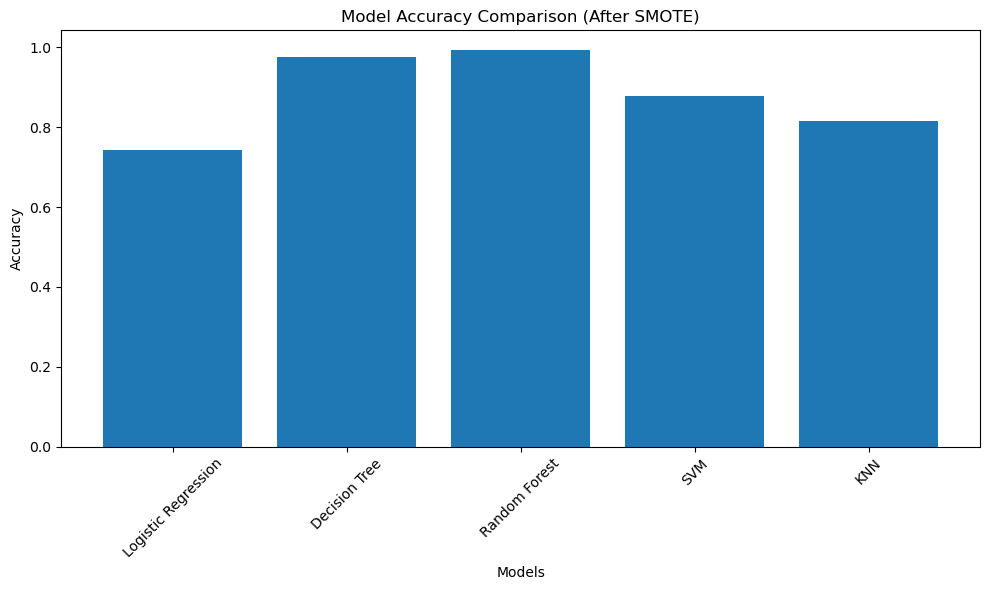

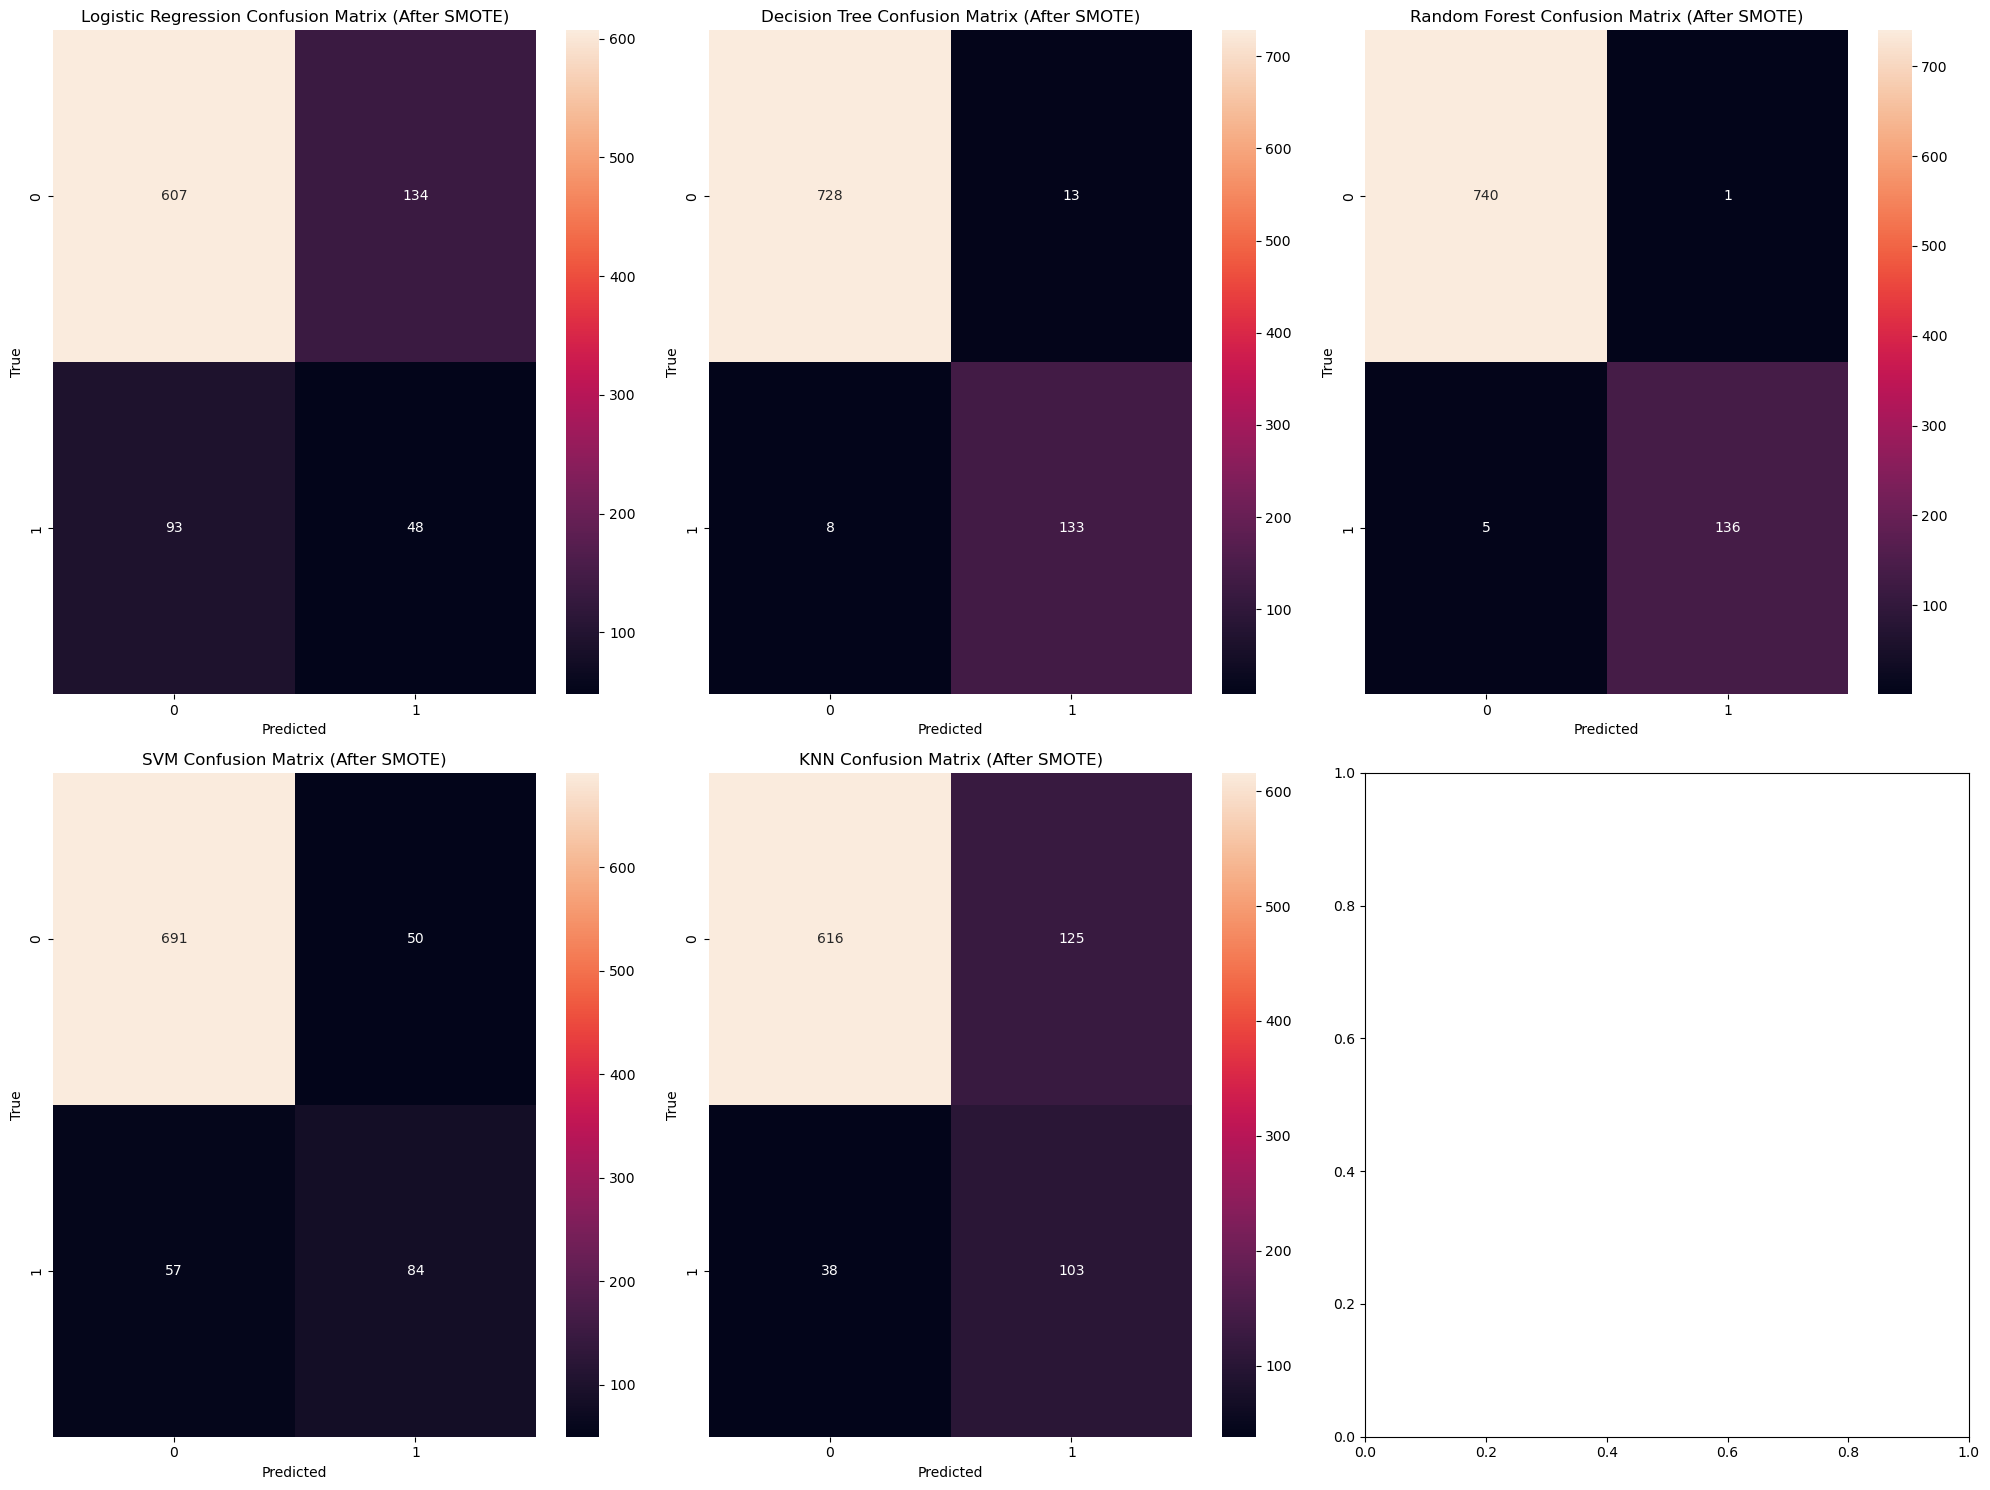


Feature Correlations with Target Variable:
Age: 0.0000
DistanceFromHome: 0.0000
Education: 0.0000
EmployeeCount: 0.0000
EmployeeID: 0.0000
JobLevel: 0.0000
MonthlyIncome: 0.0000
NumCompaniesWorked: 0.0000
PercentSalaryHike: 0.0000
StandardHours: 0.0000
StockOptionLevel: 0.0000
TotalWorkingYears: 0.0000
TrainingTimesLastYear: 0.0000
YearsAtCompany: 0.0000
YearsSinceLastPromotion: 0.0000
YearsWithCurrManager: 0.0000
BusinessTravel_bin_0: 0.0000
BusinessTravel_bin_1: 0.0000
Department_bin_0: 0.0000
Department_bin_1: 0.0000
EducationField_bin_0: 0.0000
EducationField_bin_1: 0.0000
EducationField_bin_2: 0.0000
Gender_bin_0: 0.0000
JobRole_bin_0: 0.0000
JobRole_bin_1: 0.0000
JobRole_bin_2: 0.0000
JobRole_bin_3: 0.0000
MaritalStatus_bin_0: 0.0000
MaritalStatus_bin_1: 0.0000


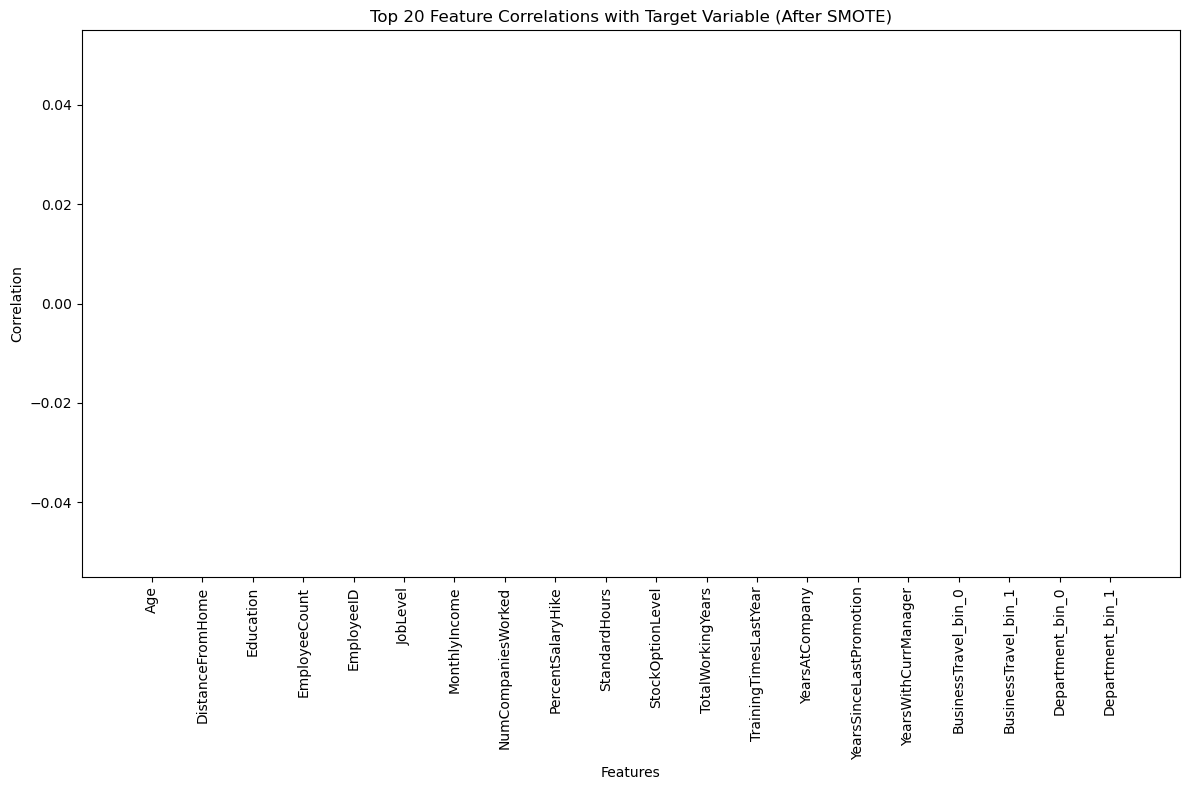

In [26]:
# Applying SMOTE Technique on Target variable and predicting using machine learning algorithms


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr, chi2_contingency
from imblearn.over_sampling import SMOTE

if isinstance(y, pd.DataFrame):
    y = y.idxmax(axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", dict(zip(*np.unique(y_train, return_counts=True))))
print("After SMOTE:", dict(zip(*np.unique(y_train_smote, return_counts=True))))

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Define the models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier()
}

# Function to train and evaluate a model
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, y_pred

# Train and evaluate each model
results = {}
for name, model in models.items():
    accuracy, y_pred = train_evaluate_model(model, X_train_scaled, X_test_scaled, y_train_smote, y_test)
    results[name] = {"accuracy": accuracy, "predictions": y_pred}
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Visualize the results
plt.figure(figsize=(10, 6))
accuracies = [result["accuracy"] for result in results.values()]
plt.bar(results.keys(), accuracies)
plt.title("Model Accuracy Comparison (After SMOTE)")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
axes = axes.ravel()
for i, (name, result) in enumerate(results.items()):
    cm = confusion_matrix(y_test, result["predictions"])
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i])
    axes[i].set_title(f"{name} Confusion Matrix (After SMOTE)")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("True")
plt.tight_layout()
plt.show()

# Combine X_train_smote and y_train_smote into a DataFrame for correlation analysis
df_smote = pd.DataFrame(X_train_smote, columns=X_encoded.columns)
df_smote['target'] = y_train_smote

# Function to calculate correlation based on feature type
def calculate_correlation(feature, target):
    if pd.api.types.is_numeric_dtype(feature):
        if feature.nunique() == 1:
            return 0  # Return 0 correlation for constant features
        try:
            correlation, p_value = pointbiserialr(target, feature)
            return abs(correlation)
        except:
            return 0  # Return 0 if correlation can't be calculated
    else:
        if feature.nunique() == 1:
            return 0  # Return 0 correlation for constant features
        try:
            chi2, p_value, dof, expected = chi2_contingency([feature, target])
            n = len(feature)
            return np.sqrt(chi2 / (n * (min(feature.nunique(), target.nunique()) - 1)))
        except:
            return 0  # Return 0 if chi-square can't be calculated

# Calculate correlations
correlations = {}
for column in df_smote.columns[:-1]:  # Exclude the target column
    correlations[column] = calculate_correlation(df_smote[column], df_smote['target'])

# Sort correlations
sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)

# Print correlations
print("\nFeature Correlations with Target Variable:")
for feature, correlation in sorted_correlations:
    print(f"{feature}: {correlation:.4f}")

# Visualize top 20 correlations
plt.figure(figsize=(12, 8))
top_20_correlations = dict(sorted_correlations[:20])
plt.bar(top_20_correlations.keys(), top_20_correlations.values())
plt.title("Top 20 Feature Correlations with Target Variable (After SMOTE)")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Analyzing Logistic Regression


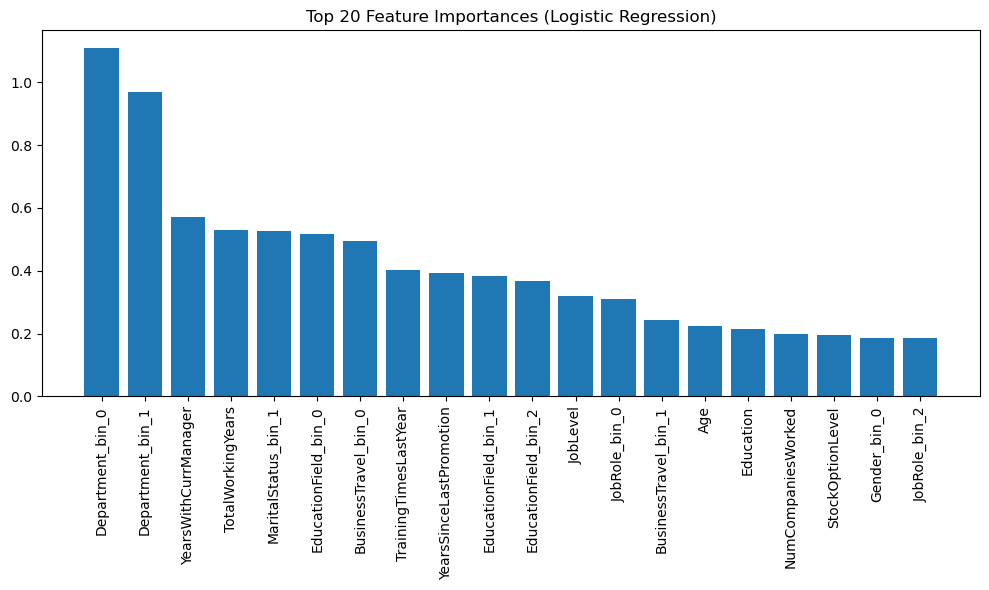

Top 10 Most Important Features (Logistic Regression):
                    feature  importance
18         Department_bin_0    1.109745
19         Department_bin_1    0.968015
15     YearsWithCurrManager    0.570238
11        TotalWorkingYears    0.528929
29      MaritalStatus_bin_1    0.525688
20     EducationField_bin_0    0.516513
16     BusinessTravel_bin_0    0.496203
12    TrainingTimesLastYear    0.402313
14  YearsSinceLastPromotion    0.393059
21     EducationField_bin_1    0.381729

Analyzing Decision Tree


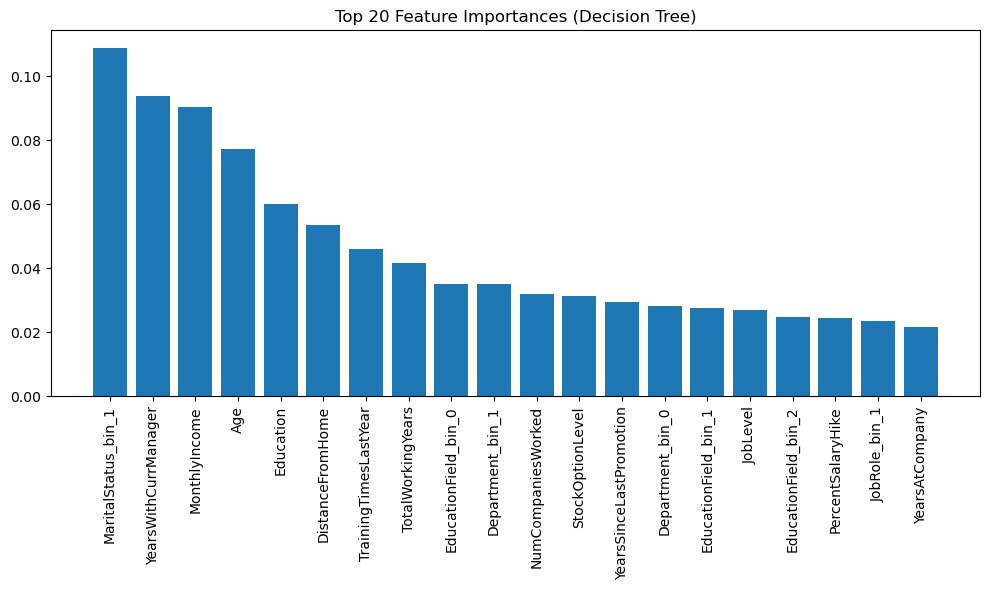

Top 10 Most Important Features (Decision Tree):
                  feature  importance
29    MaritalStatus_bin_1    0.108916
15   YearsWithCurrManager    0.093980
6           MonthlyIncome    0.090396
0                     Age    0.077355
2               Education    0.060047
1        DistanceFromHome    0.053588
12  TrainingTimesLastYear    0.046054
11      TotalWorkingYears    0.041708
20   EducationField_bin_0    0.035173
19       Department_bin_1    0.034965

Analyzing Random Forest


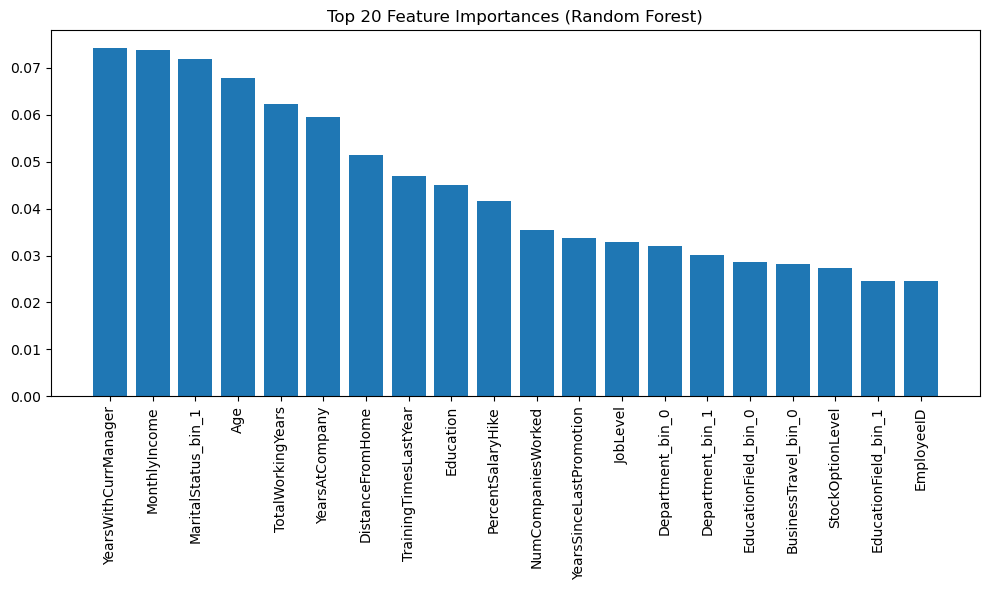

Top 10 Most Important Features (Random Forest):
                  feature  importance
15   YearsWithCurrManager    0.074241
6           MonthlyIncome    0.073751
29    MaritalStatus_bin_1    0.071912
0                     Age    0.067765
11      TotalWorkingYears    0.062360
13         YearsAtCompany    0.059493
1        DistanceFromHome    0.051416
12  TrainingTimesLastYear    0.046998
2               Education    0.045041
8       PercentSalaryHike    0.041688

Analyzing SVM


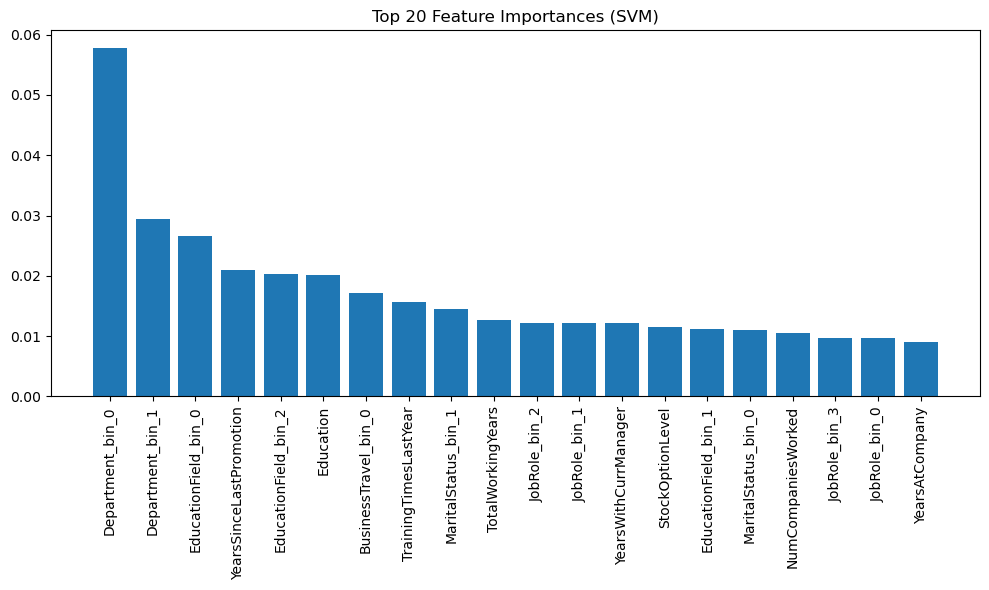

Top 10 Most Important Features (SVM):
                    feature  importance
18         Department_bin_0    0.057823
19         Department_bin_1    0.029365
20     EducationField_bin_0    0.026644
14  YearsSinceLastPromotion    0.020975
22     EducationField_bin_2    0.020295
2                 Education    0.020068
16     BusinessTravel_bin_0    0.017120
12    TrainingTimesLastYear    0.015646
29      MaritalStatus_bin_1    0.014512
11        TotalWorkingYears    0.012698

Analyzing KNN


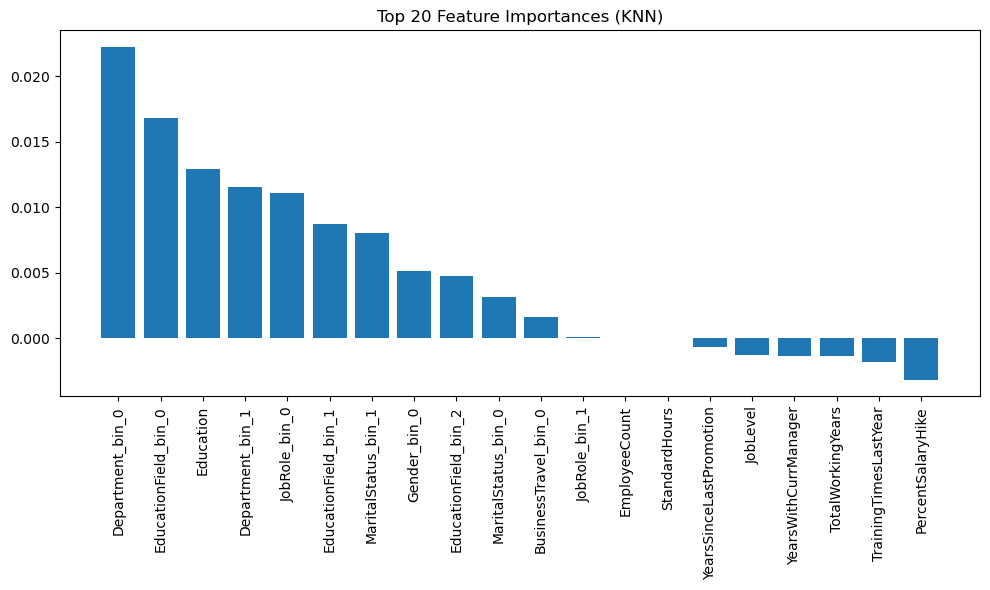

Top 10 Most Important Features (KNN):
                 feature  importance
18      Department_bin_0    0.022222
20  EducationField_bin_0    0.016780
2              Education    0.012925
19      Department_bin_1    0.011565
24         JobRole_bin_0    0.011111
21  EducationField_bin_1    0.008730
29   MaritalStatus_bin_1    0.008050
23          Gender_bin_0    0.005102
22  EducationField_bin_2    0.004762
28   MaritalStatus_bin_0    0.003175


In [37]:
# Using Explainable AI for feature importance analysis with SMOTE Sampling Technique
# Combining all 5 models( Logistics regression, Decision Tree, Random Forest, SVM and KNN) 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Apply SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Function to plot permutation importance
def plot_permutation_importance(model, name):
    perm_importance = permutation_importance(model, X_test_scaled, y_test, n_repeats=10, random_state=42)
    
    feature_importances = pd.DataFrame({
        'feature': X_encoded.columns,
        'importance': perm_importance.importances_mean
    })
    feature_importances = feature_importances.sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.bar(feature_importances['feature'][:20], feature_importances['importance'][:20])
    plt.xticks(rotation=90)
    plt.title(f'Top 20 Feature Importances ({name})')
    plt.tight_layout()
    plt.show()
    
    print(f"Top 10 Most Important Features ({name}):")
    print(feature_importances.head(10))

# Define and train models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    print(f"\nAnalyzing {name}")
    model.fit(X_train_scaled, y_train_smote)
    
    if name in ["Logistic Regression", "Decision Tree", "Random Forest"]:
        if name == "Logistic Regression":
            importances = np.abs(model.coef_[0])
        else:
            importances = model.feature_importances_
        
        feature_importances = pd.DataFrame({'feature': X_encoded.columns, 'importance': importances})
        feature_importances = feature_importances.sort_values('importance', ascending=False)
        
        plt.figure(figsize=(10, 6))
        plt.bar(feature_importances['feature'][:20], feature_importances['importance'][:20])
        plt.xticks(rotation=90)
        plt.title(f'Top 20 Feature Importances ({name})')
        plt.tight_layout()
        plt.show()
        
        print(f"Top 10 Most Important Features ({name}):")
        print(feature_importances.head(10))
    else:
        plot_permutation_importance(model, name)

Before Undersampling: {'target_No': 2958, 'target_Yes': 570}
After Undersampling: {'target_No': 570, 'target_Yes': 570}

Analyzing Logistic Regression


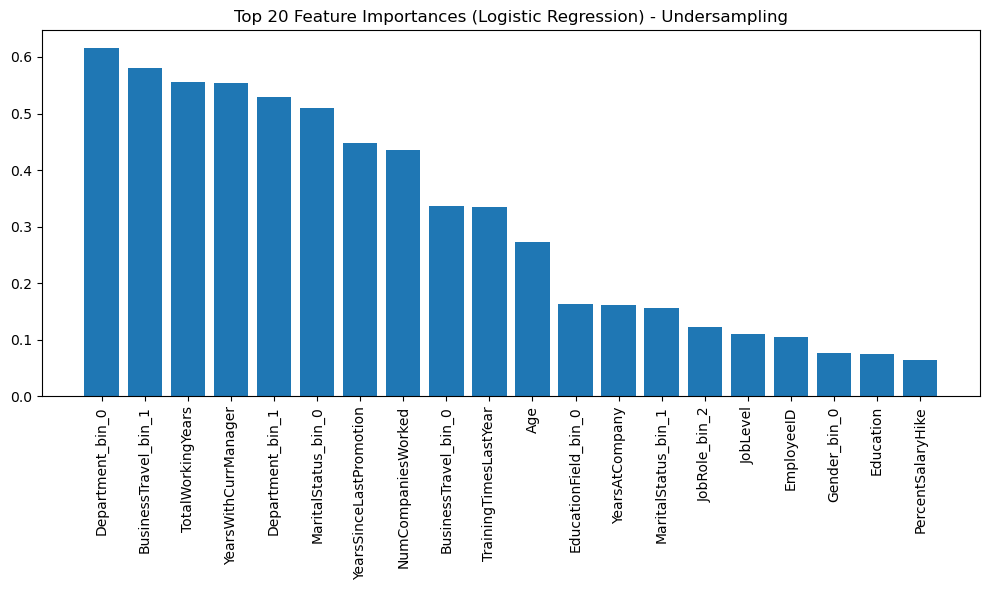

Top 10 Most Important Features (Logistic Regression):
                    feature  importance
18         Department_bin_0    0.616209
17     BusinessTravel_bin_1    0.581099
11        TotalWorkingYears    0.555751
15     YearsWithCurrManager    0.553208
19         Department_bin_1    0.528816
28      MaritalStatus_bin_0    0.509094
14  YearsSinceLastPromotion    0.447736
7        NumCompaniesWorked    0.435763
16     BusinessTravel_bin_0    0.337296
12    TrainingTimesLastYear    0.334372

Analyzing Decision Tree


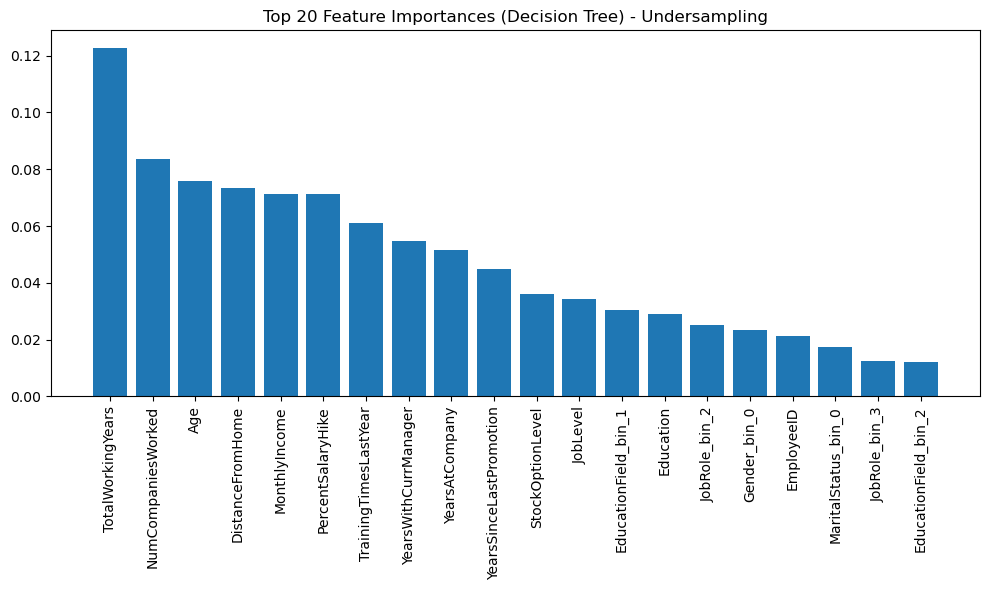

Top 10 Most Important Features (Decision Tree):
                    feature  importance
11        TotalWorkingYears    0.122794
7        NumCompaniesWorked    0.083776
0                       Age    0.075711
1          DistanceFromHome    0.073344
6             MonthlyIncome    0.071302
8         PercentSalaryHike    0.071171
12    TrainingTimesLastYear    0.060943
15     YearsWithCurrManager    0.054749
13           YearsAtCompany    0.051399
14  YearsSinceLastPromotion    0.045021

Analyzing Random Forest


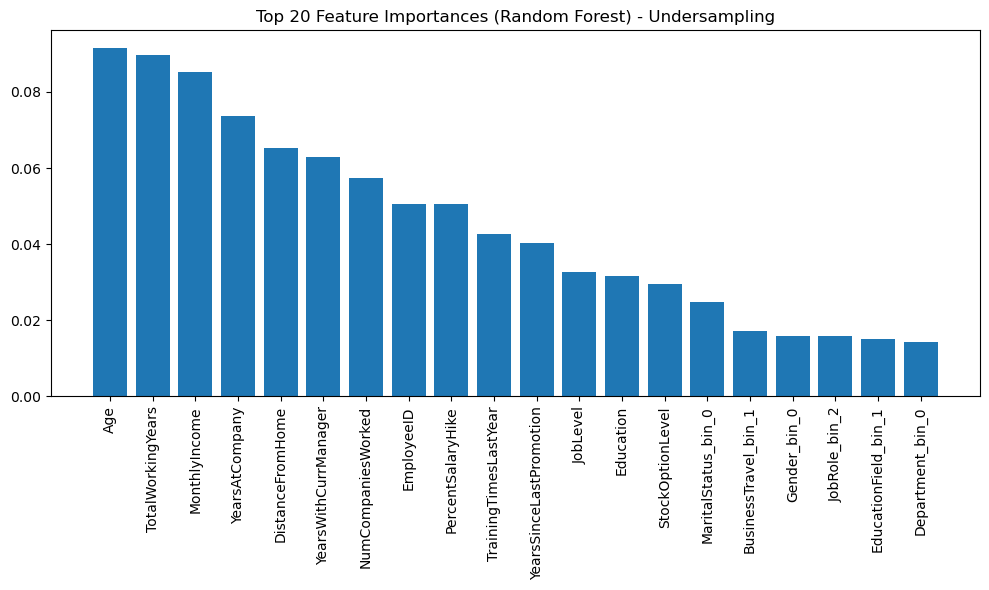

Top 10 Most Important Features (Random Forest):
                  feature  importance
0                     Age    0.091622
11      TotalWorkingYears    0.089807
6           MonthlyIncome    0.085209
13         YearsAtCompany    0.073741
1        DistanceFromHome    0.065226
15   YearsWithCurrManager    0.062932
7      NumCompaniesWorked    0.057481
4              EmployeeID    0.050660
8       PercentSalaryHike    0.050630
12  TrainingTimesLastYear    0.042765

Analyzing SVM


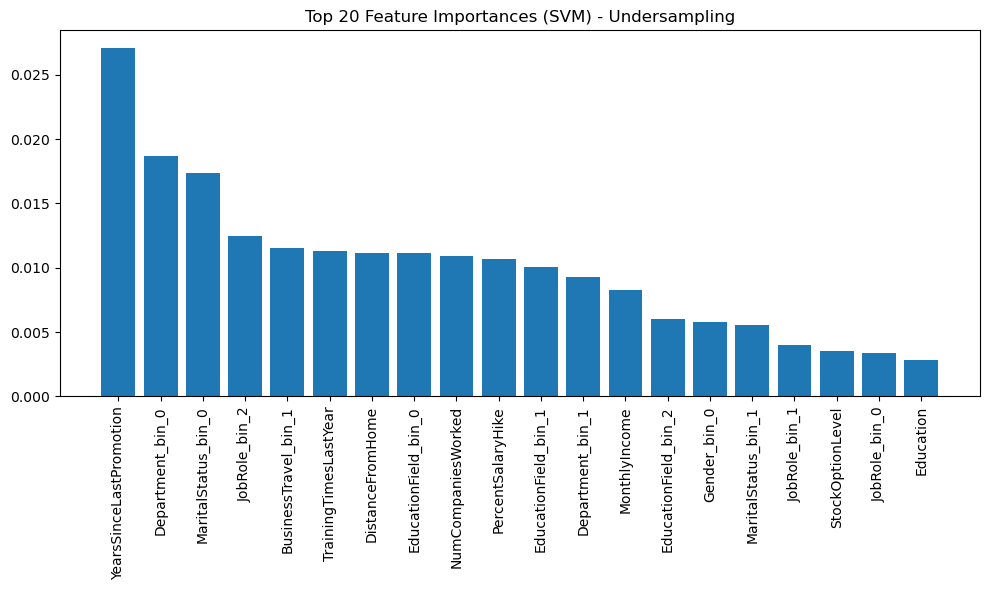

Top 10 Most Important Features (SVM):
                    feature  importance
14  YearsSinceLastPromotion    0.027098
18         Department_bin_0    0.018707
28      MaritalStatus_bin_0    0.017347
26            JobRole_bin_2    0.012472
17     BusinessTravel_bin_1    0.011565
12    TrainingTimesLastYear    0.011338
1          DistanceFromHome    0.011111
20     EducationField_bin_0    0.011111
7        NumCompaniesWorked    0.010884
8         PercentSalaryHike    0.010658

Analyzing KNN


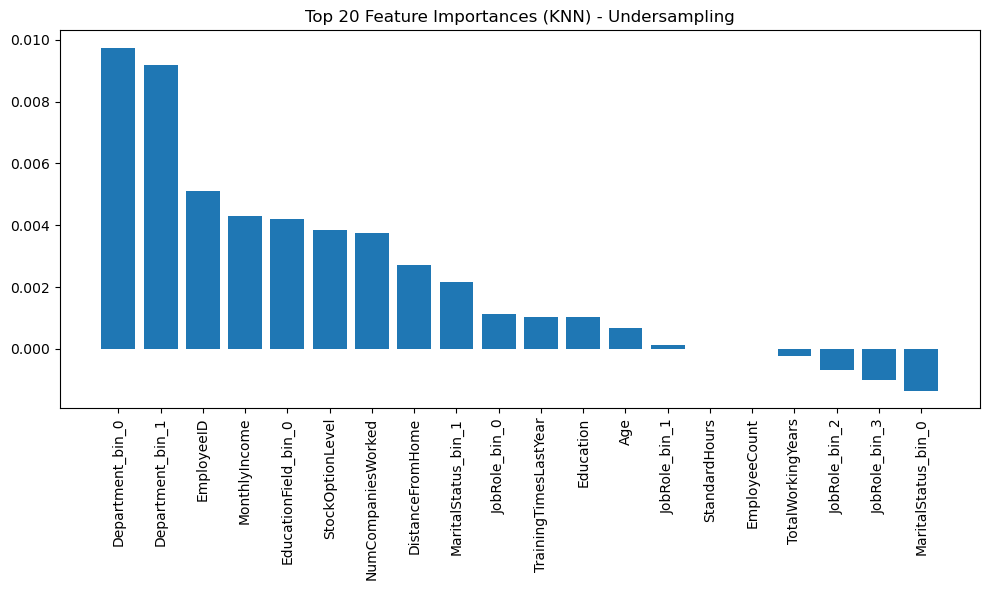

Top 10 Most Important Features (KNN):
                 feature  importance
18      Department_bin_0    0.009751
19      Department_bin_1    0.009184
4             EmployeeID    0.005102
6          MonthlyIncome    0.004308
20  EducationField_bin_0    0.004195
10      StockOptionLevel    0.003855
7     NumCompaniesWorked    0.003741
1       DistanceFromHome    0.002721
29   MaritalStatus_bin_1    0.002154
24         JobRole_bin_0    0.001134


In [38]:
# Using Explainable AI for feature importance analysis with Random Undersampling Technique
# Combining all 5 models( Logistics regression, Decision Tree, Random Forest, SVM and KNN)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Apply Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print("Before Undersampling:", dict(zip(*np.unique(y_train, return_counts=True))))
print("After Undersampling:", dict(zip(*np.unique(y_train_rus, return_counts=True))))

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_rus)
X_test_scaled = scaler.transform(X_test)

# Function to plot permutation importance
def plot_permutation_importance(model, name):
    perm_importance = permutation_importance(model, X_test_scaled, y_test, n_repeats=10, random_state=42)
    
    feature_importances = pd.DataFrame({
        'feature': X_encoded.columns,
        'importance': perm_importance.importances_mean
    })
    feature_importances = feature_importances.sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.bar(feature_importances['feature'][:20], feature_importances['importance'][:20])
    plt.xticks(rotation=90)
    plt.title(f'Top 20 Feature Importances ({name}) - Undersampling')
    plt.tight_layout()
    plt.show()
    
    print(f"Top 10 Most Important Features ({name}):")
    print(feature_importances.head(10))

# Define and train models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    print(f"\nAnalyzing {name}")
    model.fit(X_train_scaled, y_train_rus)
    
    if name in ["Logistic Regression", "Decision Tree", "Random Forest"]:
        if name == "Logistic Regression":
            importances = np.abs(model.coef_[0])
        else:
            importances = model.feature_importances_
        
        feature_importances = pd.DataFrame({'feature': X_encoded.columns, 'importance': importances})
        feature_importances = feature_importances.sort_values('importance', ascending=False)
        
        plt.figure(figsize=(10, 6))
        plt.bar(feature_importances['feature'][:20], feature_importances['importance'][:20])
        plt.xticks(rotation=90)
        plt.title(f'Top 20 Feature Importances ({name}) - Undersampling')
        plt.tight_layout()
        plt.show()
        
        print(f"Top 10 Most Important Features ({name}):")
        print(feature_importances.head(10))
    else:
        plot_permutation_importance(model, name)


Class distribution in training set: {'target_No': 2958, 'target_Yes': 570}

Analyzing Logistic Regression


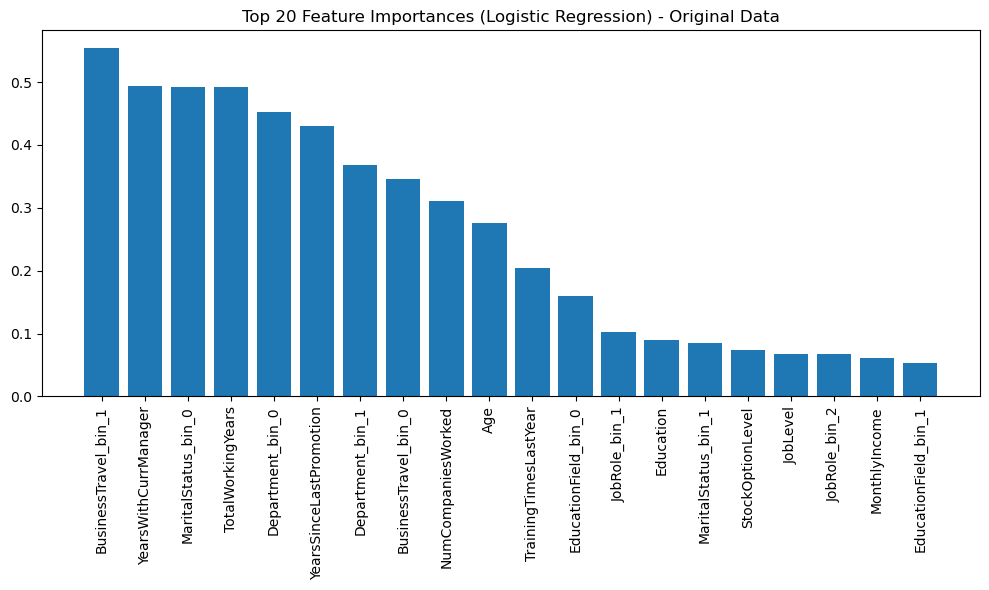

Top 10 Most Important Features (Logistic Regression):
                    feature  importance
17     BusinessTravel_bin_1    0.554536
15     YearsWithCurrManager    0.493468
28      MaritalStatus_bin_0    0.492076
11        TotalWorkingYears    0.492023
18         Department_bin_0    0.452850
14  YearsSinceLastPromotion    0.430867
19         Department_bin_1    0.367622
16     BusinessTravel_bin_0    0.346470
7        NumCompaniesWorked    0.310941
0                       Age    0.275770

Analyzing Decision Tree


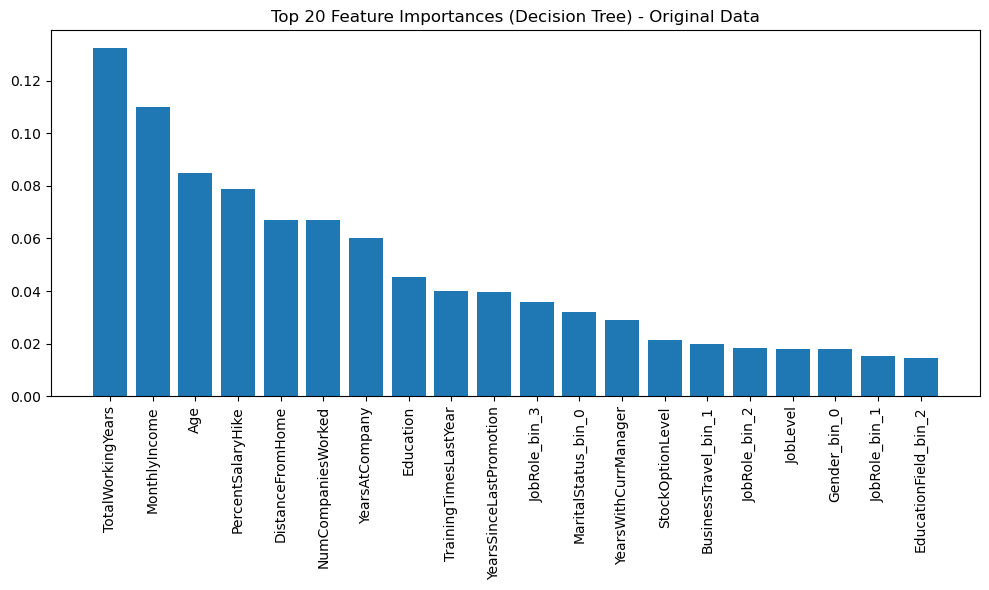

Top 10 Most Important Features (Decision Tree):
                    feature  importance
11        TotalWorkingYears    0.132455
6             MonthlyIncome    0.110001
0                       Age    0.084727
8         PercentSalaryHike    0.078963
1          DistanceFromHome    0.066988
7        NumCompaniesWorked    0.066901
13           YearsAtCompany    0.060027
2                 Education    0.045443
12    TrainingTimesLastYear    0.039976
14  YearsSinceLastPromotion    0.039517

Analyzing Random Forest


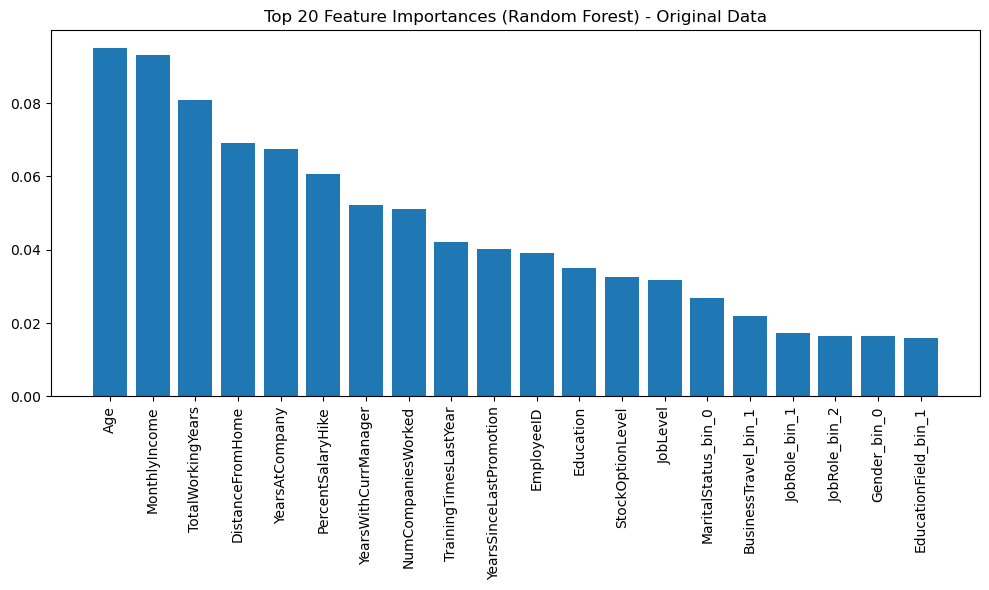

Top 10 Most Important Features (Random Forest):
                    feature  importance
0                       Age    0.095097
6             MonthlyIncome    0.093158
11        TotalWorkingYears    0.080819
1          DistanceFromHome    0.069110
13           YearsAtCompany    0.067610
8         PercentSalaryHike    0.060767
15     YearsWithCurrManager    0.052138
7        NumCompaniesWorked    0.051190
12    TrainingTimesLastYear    0.042025
14  YearsSinceLastPromotion    0.040211

Analyzing SVM


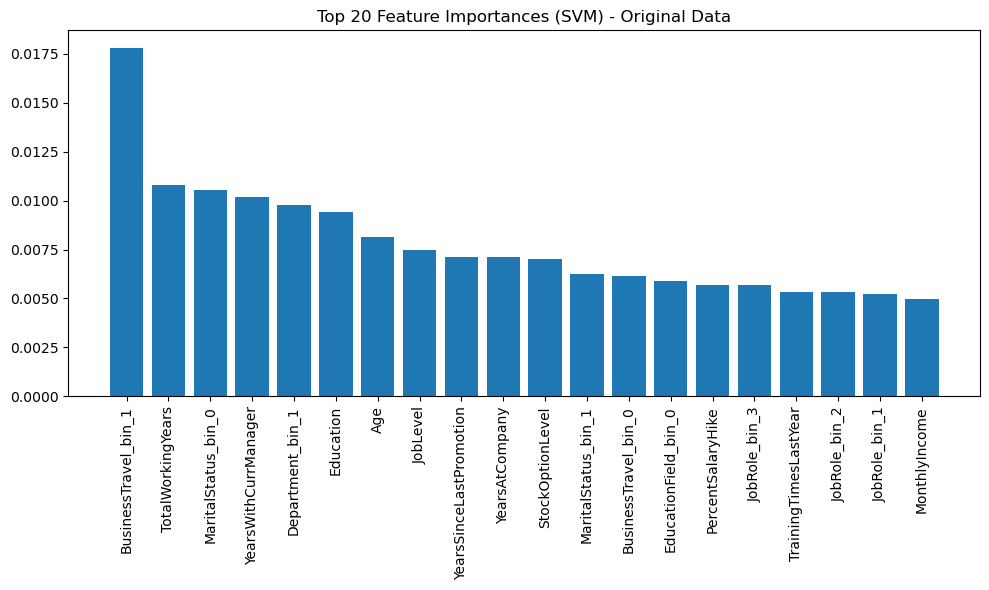

Top 10 Most Important Features (SVM):
                    feature  importance
17     BusinessTravel_bin_1    0.017800
11        TotalWorkingYears    0.010771
28      MaritalStatus_bin_0    0.010544
15     YearsWithCurrManager    0.010204
19         Department_bin_1    0.009751
2                 Education    0.009410
0                       Age    0.008163
5                  JobLevel    0.007483
14  YearsSinceLastPromotion    0.007143
13           YearsAtCompany    0.007143

Analyzing KNN


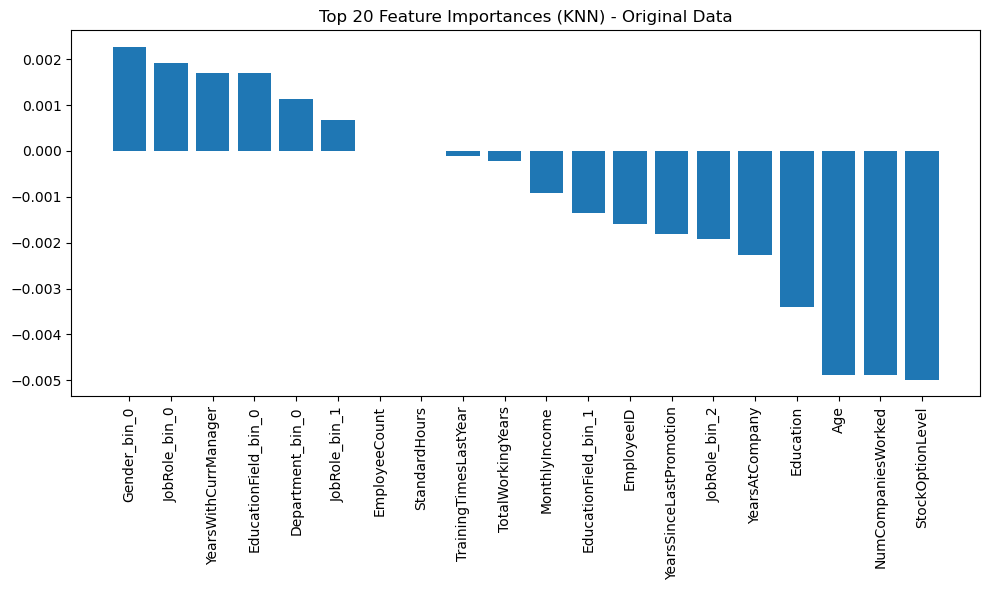

Top 10 Most Important Features (KNN):
                  feature  importance
23           Gender_bin_0    0.002268
24          JobRole_bin_0    0.001927
15   YearsWithCurrManager    0.001701
20   EducationField_bin_0    0.001701
18       Department_bin_0    0.001134
25          JobRole_bin_1    0.000680
3           EmployeeCount    0.000000
9           StandardHours    0.000000
12  TrainingTimesLastYear   -0.000113
11      TotalWorkingYears   -0.000227


In [39]:
# Using Explainable AI for feature importance analysis without any Sampling Technique
# Combining all 5 models( Logistics regression, Decision Tree, Random Forest, SVM and KNN)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Print class distribution
print("Class distribution in training set:", dict(zip(*np.unique(y_train, return_counts=True))))

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to plot permutation importance
def plot_permutation_importance(model, name):
    perm_importance = permutation_importance(model, X_test_scaled, y_test, n_repeats=10, random_state=42)
    
    feature_importances = pd.DataFrame({
        'feature': X_encoded.columns,
        'importance': perm_importance.importances_mean
    })
    feature_importances = feature_importances.sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.bar(feature_importances['feature'][:20], feature_importances['importance'][:20])
    plt.xticks(rotation=90)
    plt.title(f'Top 20 Feature Importances ({name}) - Original Data')
    plt.tight_layout()
    plt.show()
    
    print(f"Top 10 Most Important Features ({name}):")
    print(feature_importances.head(10))

# Define and train models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    print(f"\nAnalyzing {name}")
    model.fit(X_train_scaled, y_train)
    
    if name in ["Logistic Regression", "Decision Tree", "Random Forest"]:
        if name == "Logistic Regression":
            importances = np.abs(model.coef_[0])
        else:
            importances = model.feature_importances_
        
        feature_importances = pd.DataFrame({'feature': X_encoded.columns, 'importance': importances})
        feature_importances = feature_importances.sort_values('importance', ascending=False)
        
        plt.figure(figsize=(10, 6))
        plt.bar(feature_importances['feature'][:20], feature_importances['importance'][:20])
        plt.xticks(rotation=90)
        plt.title(f'Top 20 Feature Importances ({name}) - Original Data')
        plt.tight_layout()
        plt.show()
        
        print(f"Top 10 Most Important Features ({name}):")
        print(feature_importances.head(10))
    else:
        plot_permutation_importance(model, name)